# Credit Score Prediction 

### Table of Contents

* [About the dataset](#data)
* [Libraries](#lib)
* [Data Preparation](#DP)
    * [Removing Redundant Features](#RRF)
    * [UniVariate Analysis](#UA)
        * [Categorical Univariate](#CU)
    * [Bivariate Analysis](#BV)
    * [Multivariate Analysis](#MA)
* [Outlier Analysis and Treatment](#OT)
    * [Missing Values Analysis and Treatment](#MVT)
* [Multicollinearity](#MC)
* [Assumption Before Model Building](#ASBMB)
    * [Hypothesis Summary](#HS)
* [Feature Engineering](#FE)
    * [Modelling](#mod)
        * [OLS Model with and without Outliers](#ols)
        * [Decision Tree Regressor with and without Outliers](#dtr)
        * [Random Forest Regressor with and without Outliers](#rfr)
        * [Boosting Models with and without Outliers](#boost)
             * [AdaBoost Regressor Model](#ada)
             * [Gradient Boosting Model](#gb)
             * [XgBoost Regressor Model](#xgb)
        * [ElasticNet Regressor with and without Outliers](#elas)
        * [MLP Regressor with and without Outliers](#mlp)
    * [Model Comparison](#modcomp)

<a id='data'></a>
# About the Dataset

Following are the features of the dataset along with their description:
1. Loan ID - Loan ID specifies the ID of particular Loan availed by the corresponding Customer.
2. Customer ID - Customer ID specifies the unique Customer of the Financial Institution
3. Loan Status - Loan Status provides information about the status of the Loan availed by the Customer.
4. Current Loan Amount - Current Loan Amount is any loan that is fully paid till date according to the institution.
5. Term - The time period of the Loan
6. Credit Score - Indicator of a person's creditworthiness, or their ability to repay debt
7. Annual Income - The total amount of money a customer makes each year before deductions are taken out of the pay
8. Years in current job - Number of years in the current job
9. Home Ownership - Type of Home ownership of the customer
10. Purpose - Purpose of the Loan being availed
11. Monthly Debt - Monthly debts are recurring monthly payments, such as credit card payments, loan payments
12. Years of Credit History - Number of years in which a person pays back loans, credits, etc, over time
13. Months since last delinquent - Number of months since a borrower was late or overdue on a payment, such as income taxes, a                                      mortgage, an automobile loan, or a credit card account
14. Number of Open Accounts - Number of Open Accounts of a Customer
15. Number of Credit Problems - Number of Credit Problems of a Customer
16. Current Credit Balance - The current amount of all charges and payments made to the customers account up to that day
17. Maximum Open Credit - The maximum amount of credit available to the customer
18. Bankruptcies - Number of times a customer have gone Bankrupt 
19. Tax Liens - Number of times a customer is exempted from Tax 

<a id="lib"> </a>
# Importing the required libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id='DP'></a>
# Importing the dataset

After importing libraries, we have imported our dataset by using the address of its location and defined that dataframe as df.

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/kennedykwangari/Predicting-Future-Bank-Loans-Status-Classification/master/credit_train.csv')

In [5]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


Checking the rows and columns of dataset.

In [6]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 100514
Number of Columns: 19


Checking datatypes and missing values in the variables.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [8]:
#Statistics summary for numeric variable
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
#Statistics summary for categorical variable
df.select_dtypes('O').describe()

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose
count,100000,100000,100000,100000,95778,100000,100000
unique,81999,81999,2,2,11,4,16
top,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation
freq,2,2,77361,72208,31121,48410,78552


In [10]:
#Checking for row level all null values
df[df.isna().all(axis=1)==True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#There are 514 null records as we can see above. We will remove these records.

In [11]:
df = df[df.isna().all(axis=1)==False]
df.shape

(100000, 19)

There are two features 'Loan ID' and 'Customer ID' which is used for identification(not required in Modelling). 
So we will drop these 2 features after the duplicacy check.


<a id='RRF'></a>
### Removing redundant feature

Checking duplicate record on 'Customer ID'.

In [12]:
df['Customer ID'].duplicated().value_counts()


False    81999
True     18001
Name: Customer ID, dtype: int64

Checking duplicate record on 'Loan ID'.

In [13]:
df['Loan ID'].duplicated().value_counts()


False    81999
True     18001
Name: Loan ID, dtype: int64

#### Dropping the duplicate records in 'Customer ID'.

In [14]:
df.drop_duplicates(subset ="Customer ID",
                     keep = 'first', inplace = True)

In [15]:
df['Customer ID'].duplicated().value_counts()

False    81999
Name: Customer ID, dtype: int64

In [16]:
#'Customer ID' feature is redundant. Hence dropping it.
df.drop(labels=['Customer ID'], axis=1, inplace=True)

In [17]:
df.shape
#After dropping 'Customer ID' there are 18 features left.

(81999, 18)

Checking for duplicate records in 'Loan ID'

In [18]:
df['Loan ID'].duplicated().value_counts()


False    81999
Name: Loan ID, dtype: int64

There is no duplicate records left in 'Loan ID' after dropping the duplicates in 'Customer ID'.

All the duplicate records are removed.

### Removing insignificant feature


In [19]:
#Since 'Loan ID' is used only for identification and not needed in modeling. We will drop 'Loan ID' column.
df.drop(labels=['Loan ID'], axis=1, inplace=True)
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [20]:
df.shape

(81999, 17)

After dropping the identification features and duplicate records we are left with 81,999 rows and 17 columns.
Out of 17 columns - there are 16 independent feature and 1 target feature ['Credit Score'].

In [21]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,8.199900e+04,64968.000000,6.496800e+04,81999.000000,81999.000000,37378.000000,81999.000000,81999.000000,8.199900e+04,8.199700e+04,81824.000000,81991.000000
mean,1.208640e+07,1168.410741,1.376776e+06,18330.633110,18.296783,35.064236,11.114489,0.161441,2.936203e+05,7.935358e+05,0.113463,0.028064
std,3.217953e+07,1632.676553,1.121542e+06,12127.700801,7.043774,22.021222,4.981266,0.473148,3.726145e+05,9.208747e+06,0.344674,0.254642
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.792560e+05,711.000000,8.473050e+05,10117.595000,13.500000,16.000000,8.000000,0.000000,1.133160e+05,2.804560e+05,0.000000,0.000000
50%,3.077800e+05,731.000000,1.169592e+06,16075.330000,17.000000,32.000000,10.000000,0.000000,2.099310e+05,4.777740e+05,0.000000,0.000000
75%,5.194530e+05,743.000000,1.649438e+06,23811.370000,21.800000,51.000000,14.000000,0.000000,3.669945e+05,7.984900e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<a id='UA'></a>
## **Univariate Analysis**

In [22]:
df_numerical=df.select_dtypes(np.number)

<Figure size 1500x1200 with 0 Axes>

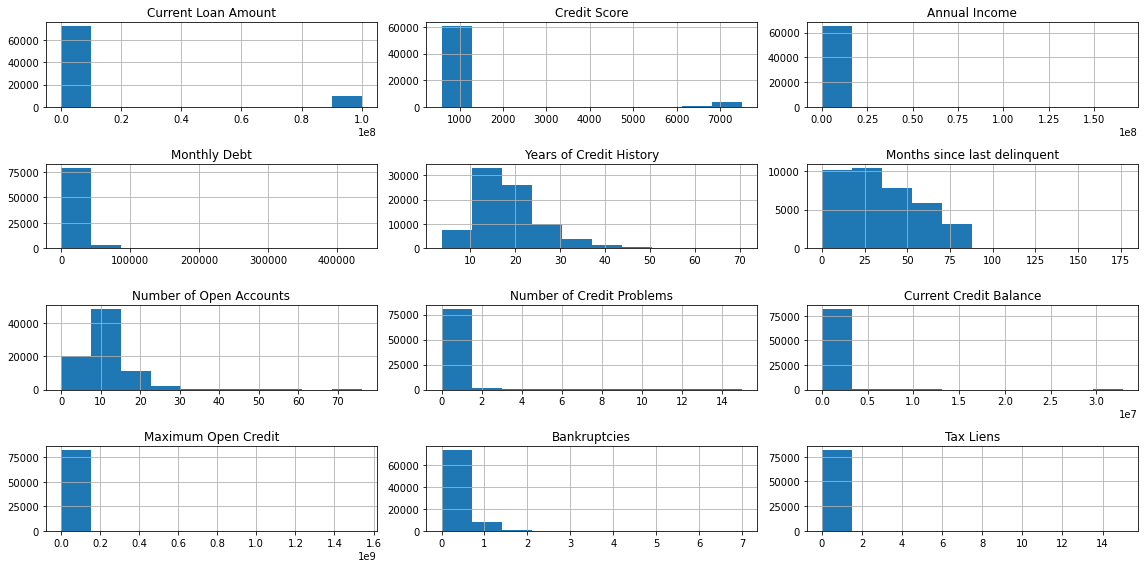

In [23]:
plt.figure(figsize=(10,8),dpi=150)
df_numerical.hist(figsize=(16,8))
plt.tight_layout()
plt.show()

In [24]:
#Most of the features are right skewed.

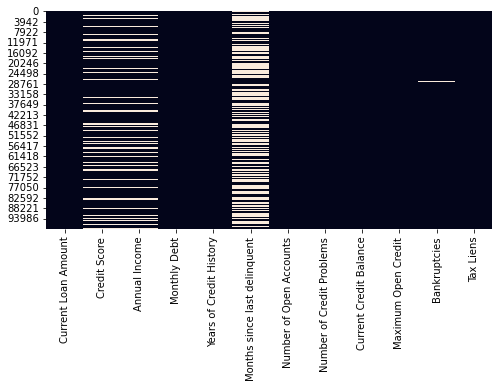

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(df_numerical.isnull(), cbar = False)
plt.show()

**Univariate for Numerical Data**

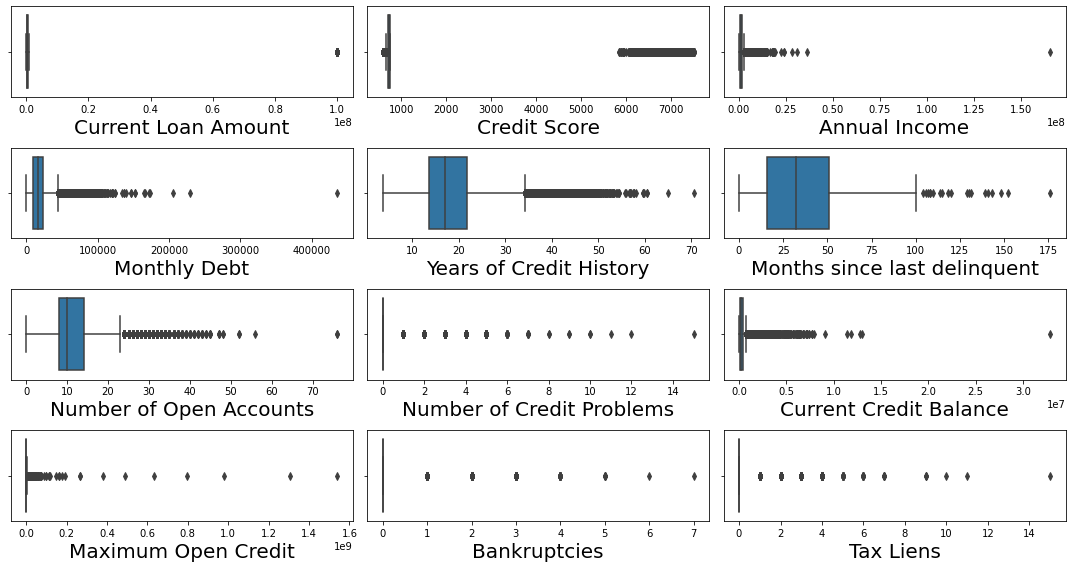

In [26]:
fig, ax = plt.subplots(4, 3, figsize=(15, 8))
for variable, subplot in zip(df_numerical.columns, ax.flatten()):
    z = sns.boxplot(x = df_numerical[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)
plt.tight_layout()

In [27]:
#Most of the features are affected by outliers

2.365910817087602


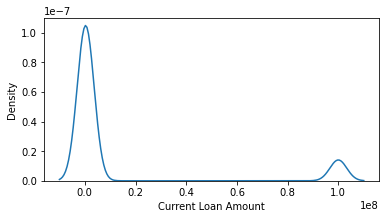

In [28]:
plt.figure(figsize = (6,3))
sns.distplot(df['Current Loan Amount'], hist = False)
print(df['Current Loan Amount'].skew())

We can infer that data is skewed and presence of some outliers in the Current Loan Amount

Skewness is 2.36

similary we found skewness for variables with representive graphs-

Credit score- violin plot (used to plot numerical data represents using curve)

Annual income - kde plot ( used to visualize probabilty density function)

Years of credit History- box plot

months since last deliquent - distplot

3.381568580301297


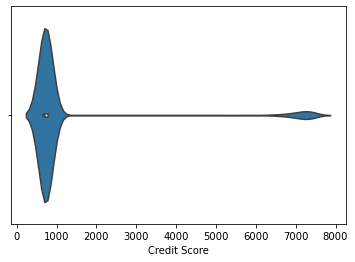

In [29]:
sns.violinplot(df['Credit Score'])
print(df['Credit Score'].skew())

Data is Skewed due presence of outliers

skewness is 3.38

51.72846553181761


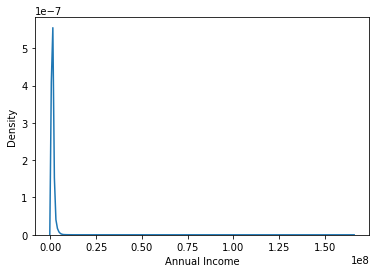

In [30]:
sns.kdeplot(df['Annual Income'])
print(df['Annual Income'].skew())

Annual Income is not normally distributed because of outliers. Observed a single outlier which is making the skew high.

Skewness is 51.73

AxesSubplot(0.125,0.125;0.775x0.755)
2.3205233213940524


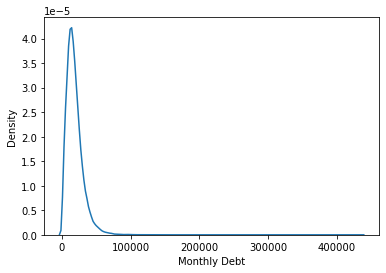

In [31]:
print(sns.kdeplot(df['Monthly Debt']))
print(df['Monthly Debt'].skew())

Monthly Debt feature is not normally distributed and the skewness is 2.32

1.0766651412765664

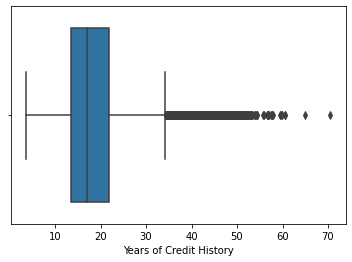

In [32]:
sns.boxplot(df['Years of Credit History'])
df['Years of Credit History'].skew()

Skewness is 1.07 so the data set is not perfectly normally

0.4275863688981907


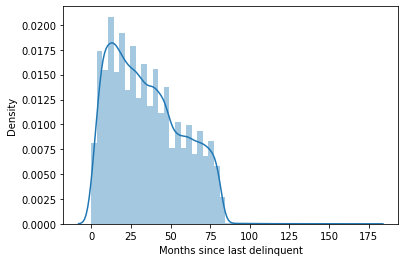

In [33]:
sns.distplot(df['Months since last delinquent'])
print(df['Months since last delinquent'].skew())

data is nearly normally distribtion and the skewness is 0.43

<a id='CU'></a>
## Categorical- Univariate

Term of the Loan Terms

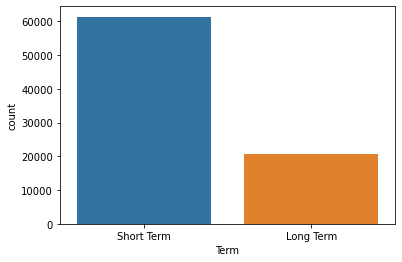

In [34]:
sns.countplot(data=df, x='Term')
plt.show()

Most of the loans are taken for short Terms

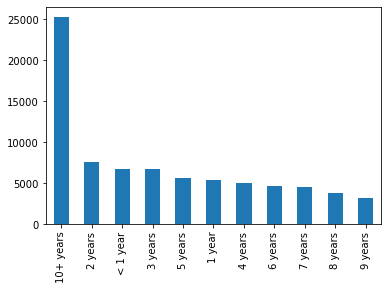

In [35]:
(df['Years in current job'].value_counts()).plot.bar()
plt.show()

Duration of loan borrowers in the current job 


10 + years count is more compared to others.

Count of Loan Status


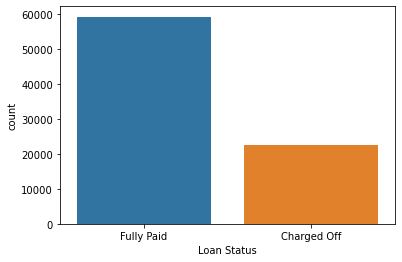

In [36]:
sns.countplot(df['Loan Status'])
plt.show()

In [37]:
df['Loan Status'].value_counts()

Fully Paid     59360
Charged Off    22639
Name: Loan Status, dtype: int64

Most of the loans have been paid fully paid. Around 27 percent loans have been charged off which accounts for the bad debts. 

### Replaced Have Mortage category as Home Mortgage

In [38]:
df['Home Ownership'].replace('HaveMortgage','Home Mortgage',inplace=True)

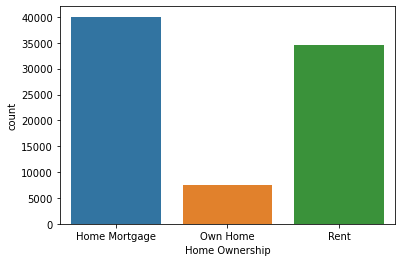

In [39]:
sns.countplot('Home Ownership',data=df)
plt.show()

In [40]:
Value = df['Home Ownership'].value_counts()
Percent = df['Home Ownership'].value_counts() / (len(df)) * 100
Home_Ownership_Total = pd.concat([Value,Percent], axis = 1,  keys=['Count', 'Percent'], names=['Home Ownership'])
Home_Ownership_Total

Home Ownership,Count,Percent
Home Mortgage,40042,48.832303
Rent,34499,42.072464
Own Home,7458,9.095233


Around 48 percent of the customers have a home mortgage and 42 percent customers have Rented houses.

### In feature 'Purpose' replaced other with Other as they are both in same category. 

In [41]:
df['Purpose'].replace('other','Other',inplace=True)

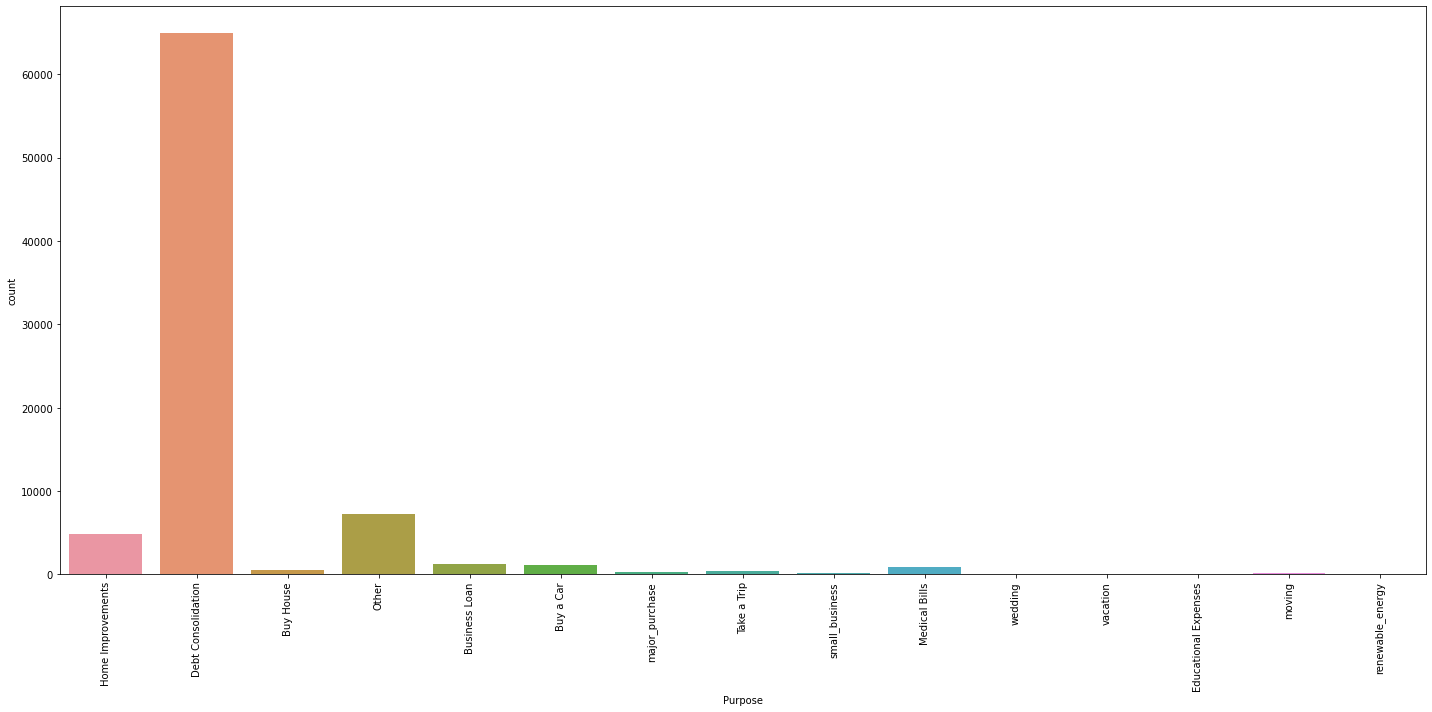

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(df['Purpose'])
plt.xticks(rotation=90)
plt.tight_layout()

<a id='BV'></a>
# Bivariate Analysis

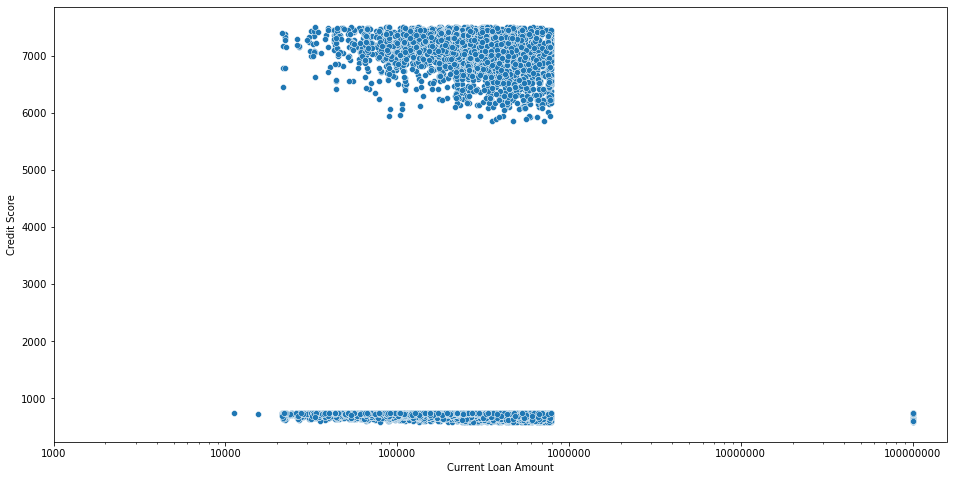

In [43]:
plt.figure(figsize=(16,8))
sns.scatterplot(x= df['Current Loan Amount'], y= df['Credit Score']).set_xscale('log')
plt.xticks([10**3,10**4,10**5,10**6, 10**7, 10**8], [1000,10000,100000,1000000,10000000, 100000000])
plt.show()

Majority of the Current Loan Amount data lie between 20000 to 900000. Also the data anamolies of Credit Score can be observed.
One value i.e 99999999 is an outlier

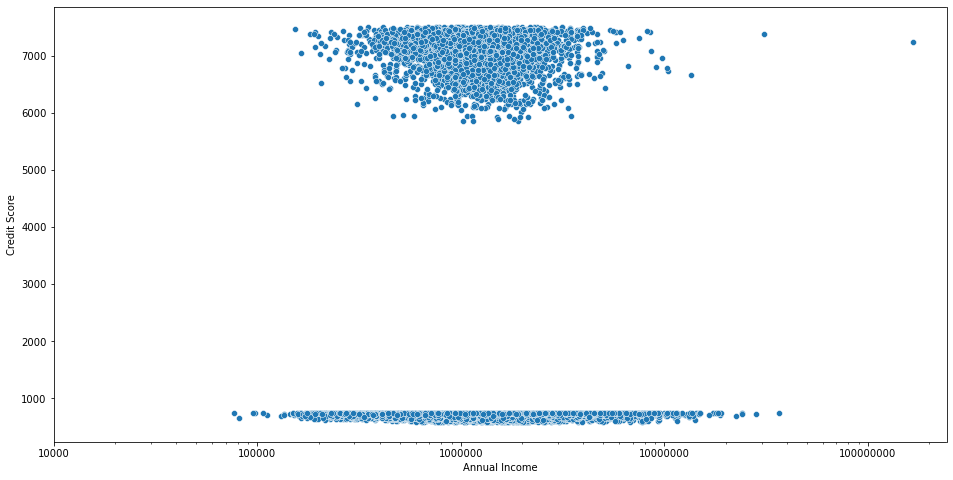

In [44]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Annual Income'], y = df['Credit Score']).set_xscale('log')
plt.xticks([10**4,10**5,10**6, 10**7, 10**8], [10000,100000,1000000,10000000, 100000000])
plt.show()

Majority of Annual income data is present between 1 lakh to 3 crore.

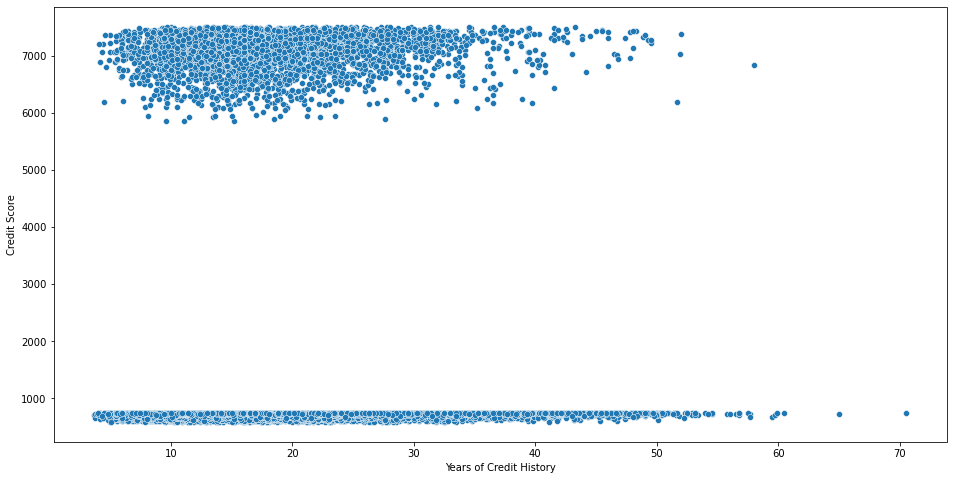

In [45]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Years of Credit History'], y = df['Credit Score'])
plt.show()

Most of the 'Years of Credit History' data lies between the range of 3 to 60 years.

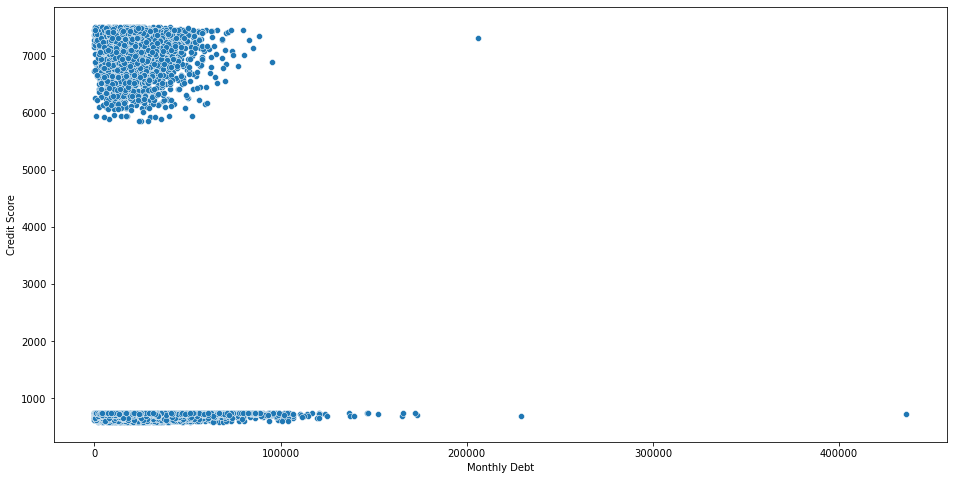

In [46]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Monthly Debt'], y = df['Credit Score'])
plt.show()

Most of the Monthly debt data is available in the range of 0 to 1.5 lakh. 

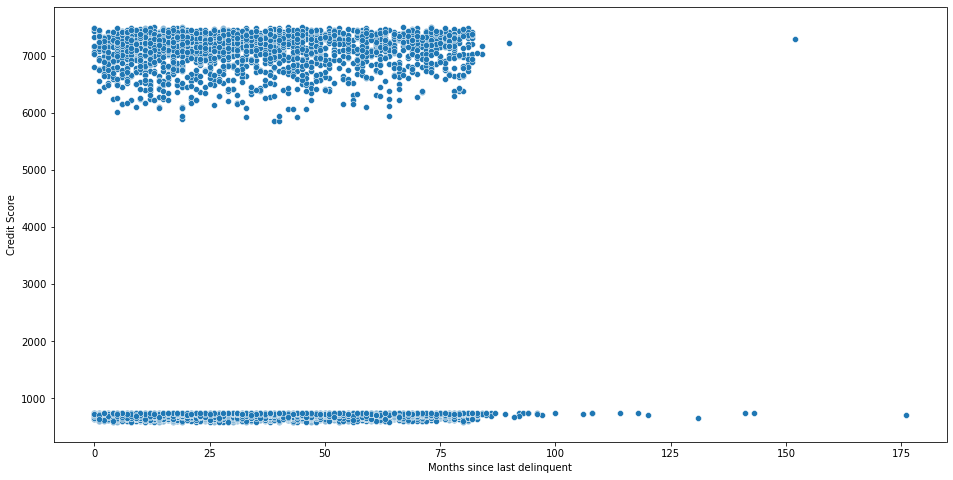

In [47]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Months since last delinquent'], y = df['Credit Score'])
plt.show()

Majority of "Months since last delinquent" data lies in range of 0 to 100.

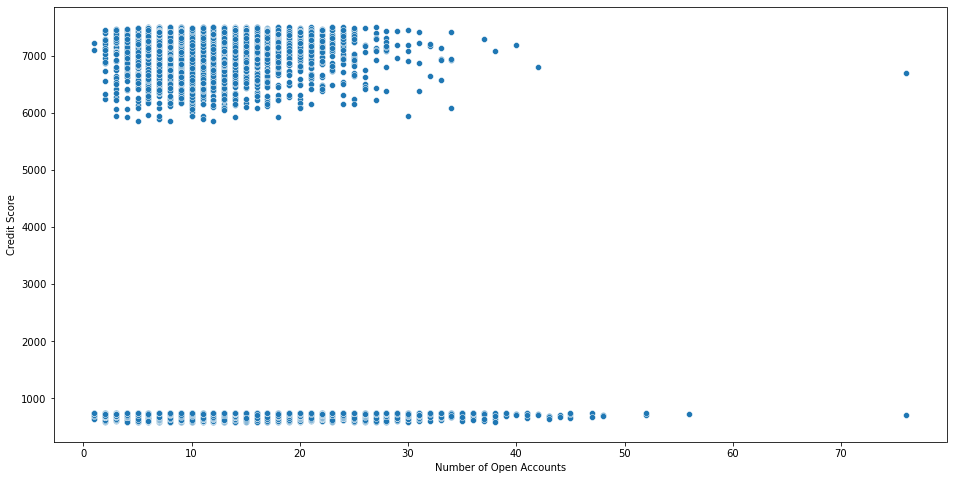

In [48]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Number of Open Accounts'], y = df['Credit Score'])
plt.show()

'Number of Open Accounts' majority data lies between 1 to 50.

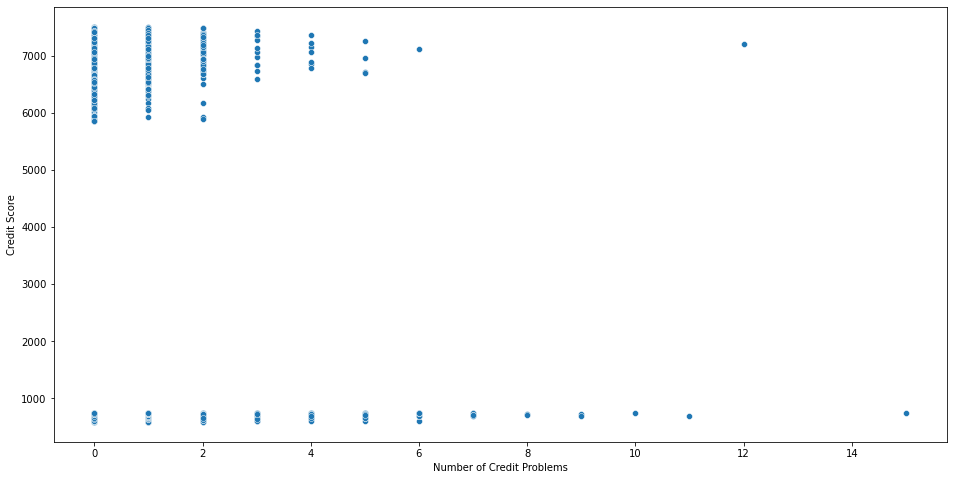

In [49]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Number of Credit Problems'], y = df['Credit Score'])
plt.show()

Most of the 'Number of Credit Problems' data lies between 0 to 11.

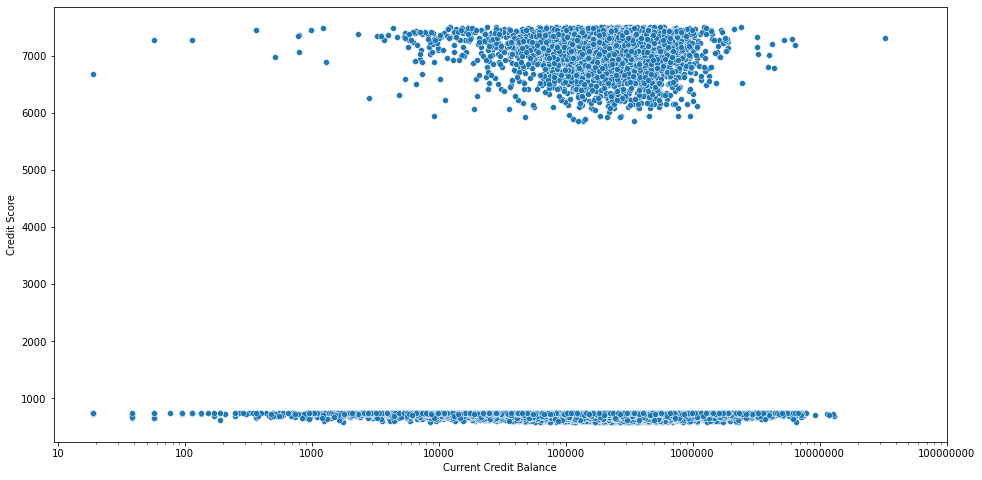

In [50]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Current Credit Balance'], y = df['Credit Score']).set_xscale('log')
plt.xticks([10**1,10**2,10**3,10**4,10**5,10**6, 10**7, 10**8], [10,100,1000,10000,100000,1000000,10000000, 100000000])
plt.show()

Most of the 'Current Credit Balance' data is available between 100 to 1 crore.

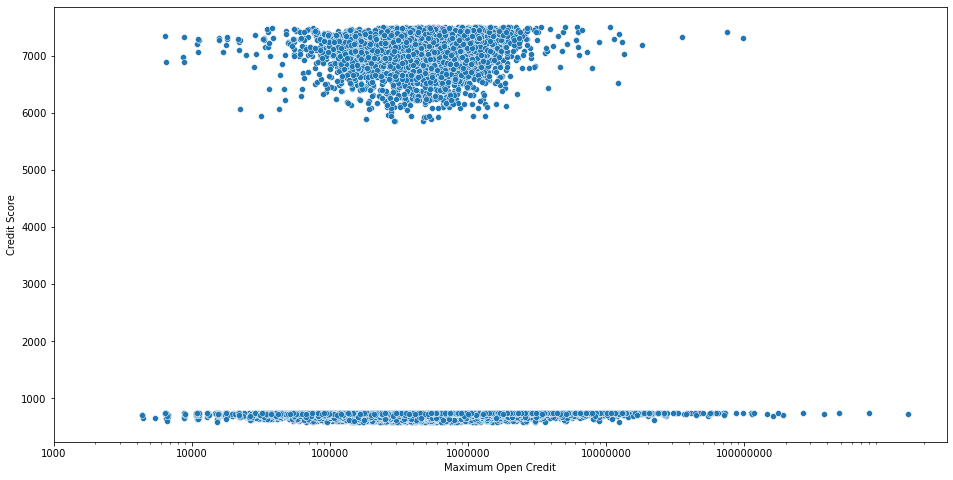

In [51]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Maximum Open Credit'], y = df['Credit Score']).set_xscale('log')
plt.xticks([10**3,10**4,10**5,10**6, 10**7, 10**8], [1000,10000,100000,1000000,10000000, 100000000])
plt.show()

'Maximum Open Credit' - majority of data is present between the range of 4k to 20 crore.

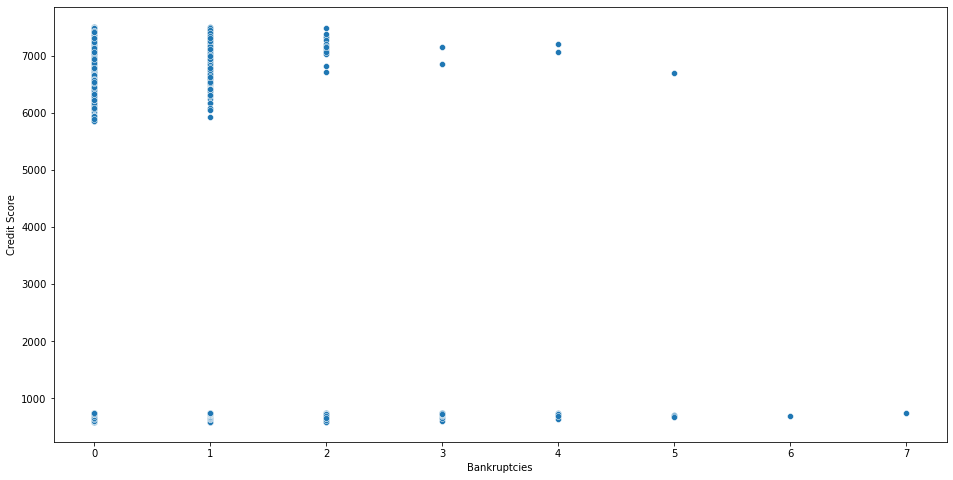

In [52]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Bankruptcies'], y = df['Credit Score'])
plt.show()

Bankruptcies ranges from 0 to 7

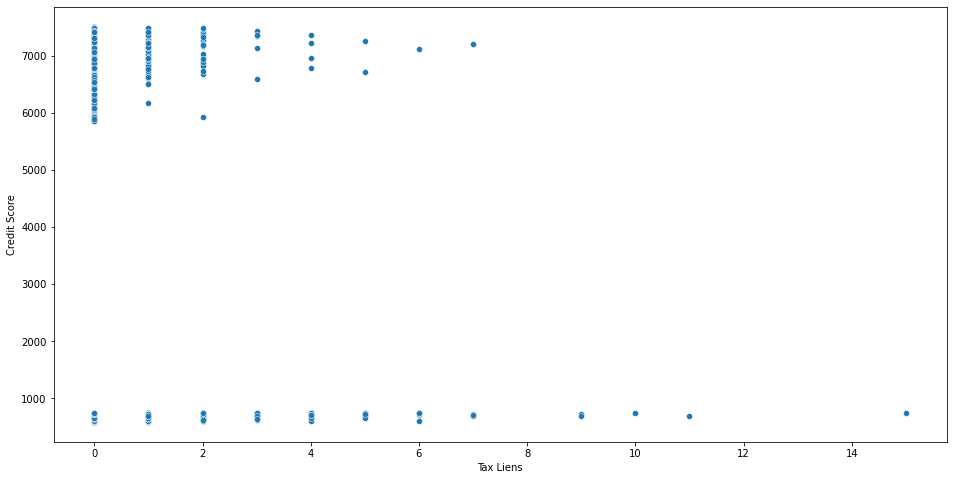

In [53]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = df['Tax Liens'], y = df['Credit Score'])
plt.show()

Tax liens ranges from 0 to 15

<Figure size 1152x576 with 0 Axes>

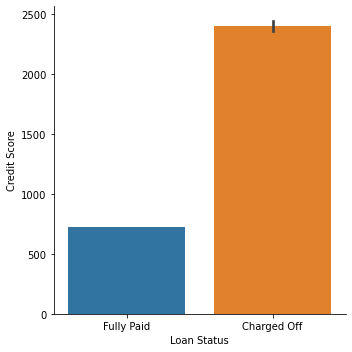

In [54]:
plt.figure(figsize=(16,8))
sns.catplot(y="Credit Score", x="Loan Status", kind="bar", data=df)
plt.show()

Credit score of charged off is more than that of fully paid as observed from below figure.

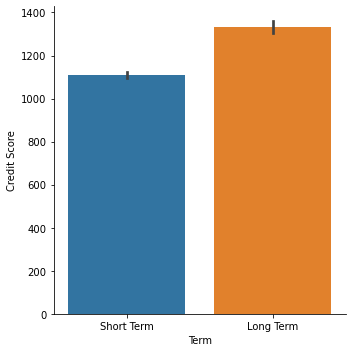

In [55]:
sns.catplot(y="Credit Score", x="Term", kind="bar", data=df)
plt.show()

Credit score of long term is more than that of short term as observerd from below figure.

<Figure size 1152x576 with 0 Axes>

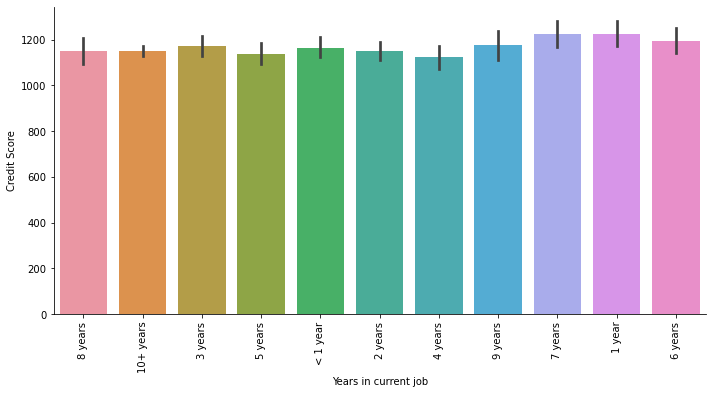

In [56]:
plt.figure(figsize=(16,8))
sns.catplot(y="Credit Score", x="Years in current job", kind="bar", data=df, aspect=2)
plt.xticks(rotation=90)
plt.show()

Credit Score of less than 7 years have good credit scores

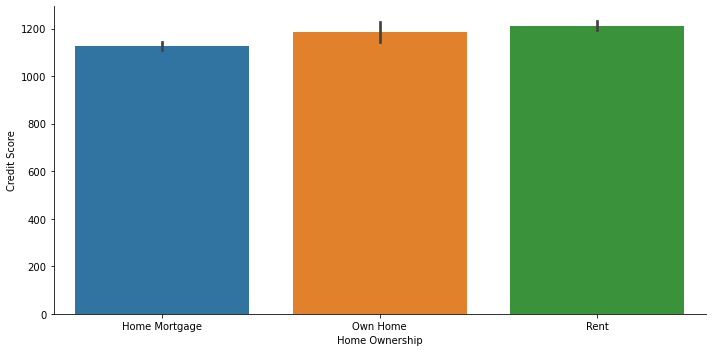

In [57]:
sns.catplot(y="Credit Score", x="Home Ownership", kind="bar", data=df,aspect=2)
plt.show()

Home ownership with rent has higher among the oher categories.

<Figure size 1152x576 with 0 Axes>

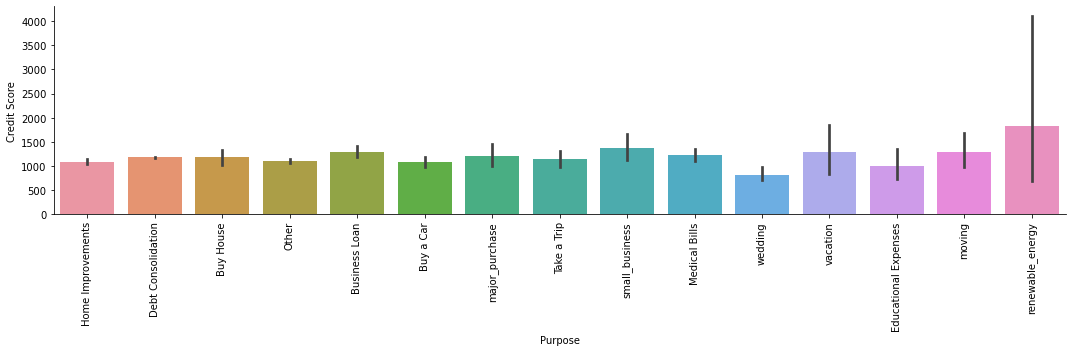

In [58]:
plt.figure(figsize=(16,8))
sns.catplot(y="Credit Score", x="Purpose", kind="bar", data=df, aspect=3)
plt.xticks(rotation=90)
plt.tight_layout()

Credit for purpose of renewable energy has most variation among the categories.

In [59]:
cross_tab_prop = pd.crosstab(index=df['Purpose'],
                             columns=df['Loan Status'],
                             normalize="index")
cross_tab_prop

Loan Status,Charged Off,Fully Paid
Purpose,,
Business Loan,0.388934,0.611066
Buy House,0.269750,0.730250
Buy a Car,0.187789,0.812211
Debt Consolidation,0.276057,0.723943
Educational Expenses,0.211765,0.788235
Home Improvements,0.242544,0.757456
Medical Bills,0.315909,0.684091
Other,0.279912,0.720088
Take a Trip,0.264368,0.735632


In [60]:
cross_tab = pd.crosstab(index=df['Purpose'],columns=df['Loan Status'])
cross_tab

Loan Status,Charged Off,Fully Paid
Purpose,,
Business Loan,478,751
Buy House,140,379
Buy a Car,203,878
Debt Consolidation,17918,46989
Educational Expenses,18,67
Home Improvements,1163,3632
Medical Bills,278,602
Other,2026,5212
Take a Trip,115,320


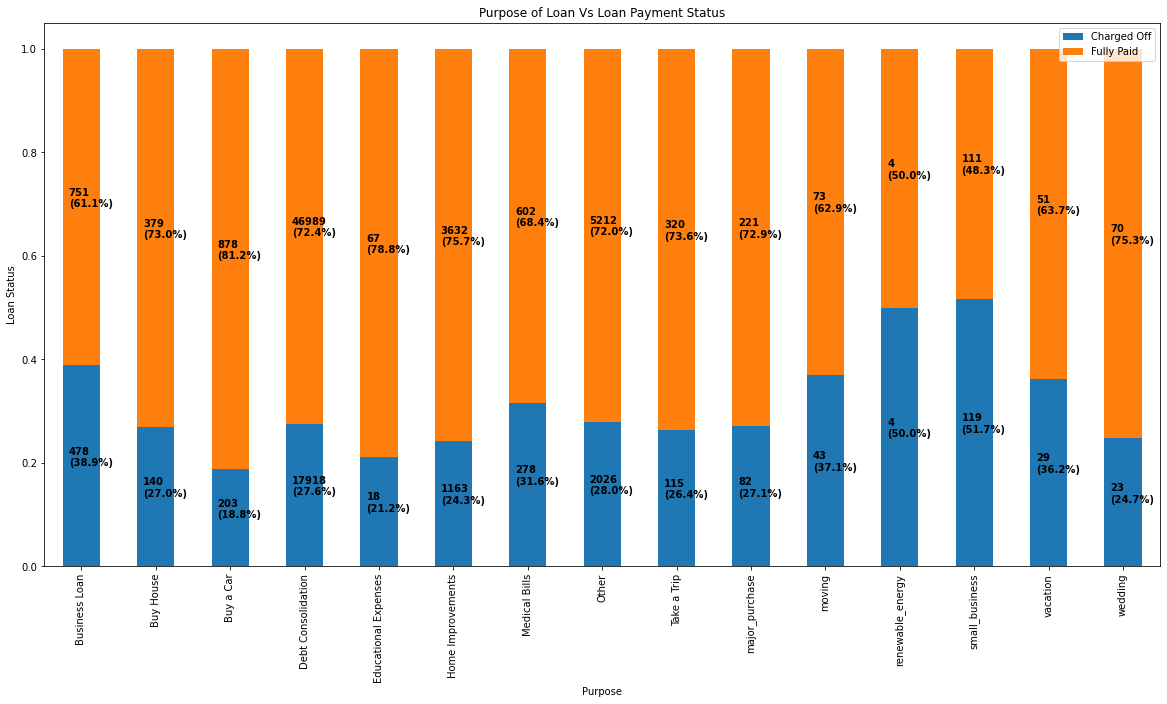

In [61]:
cross_tab_prop.plot(kind='bar', stacked=True, figsize=(20, 10), title="Purpose of Loan Vs Loan Payment Status")

plt.legend(loc="upper right")
plt.xlabel("Purpose")
plt.ylabel("Loan Status")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=10,
                 fontweight="bold")

plt.show()

<a id='MA'></a>
# Multivariate Analysis

<Figure size 720x720 with 0 Axes>

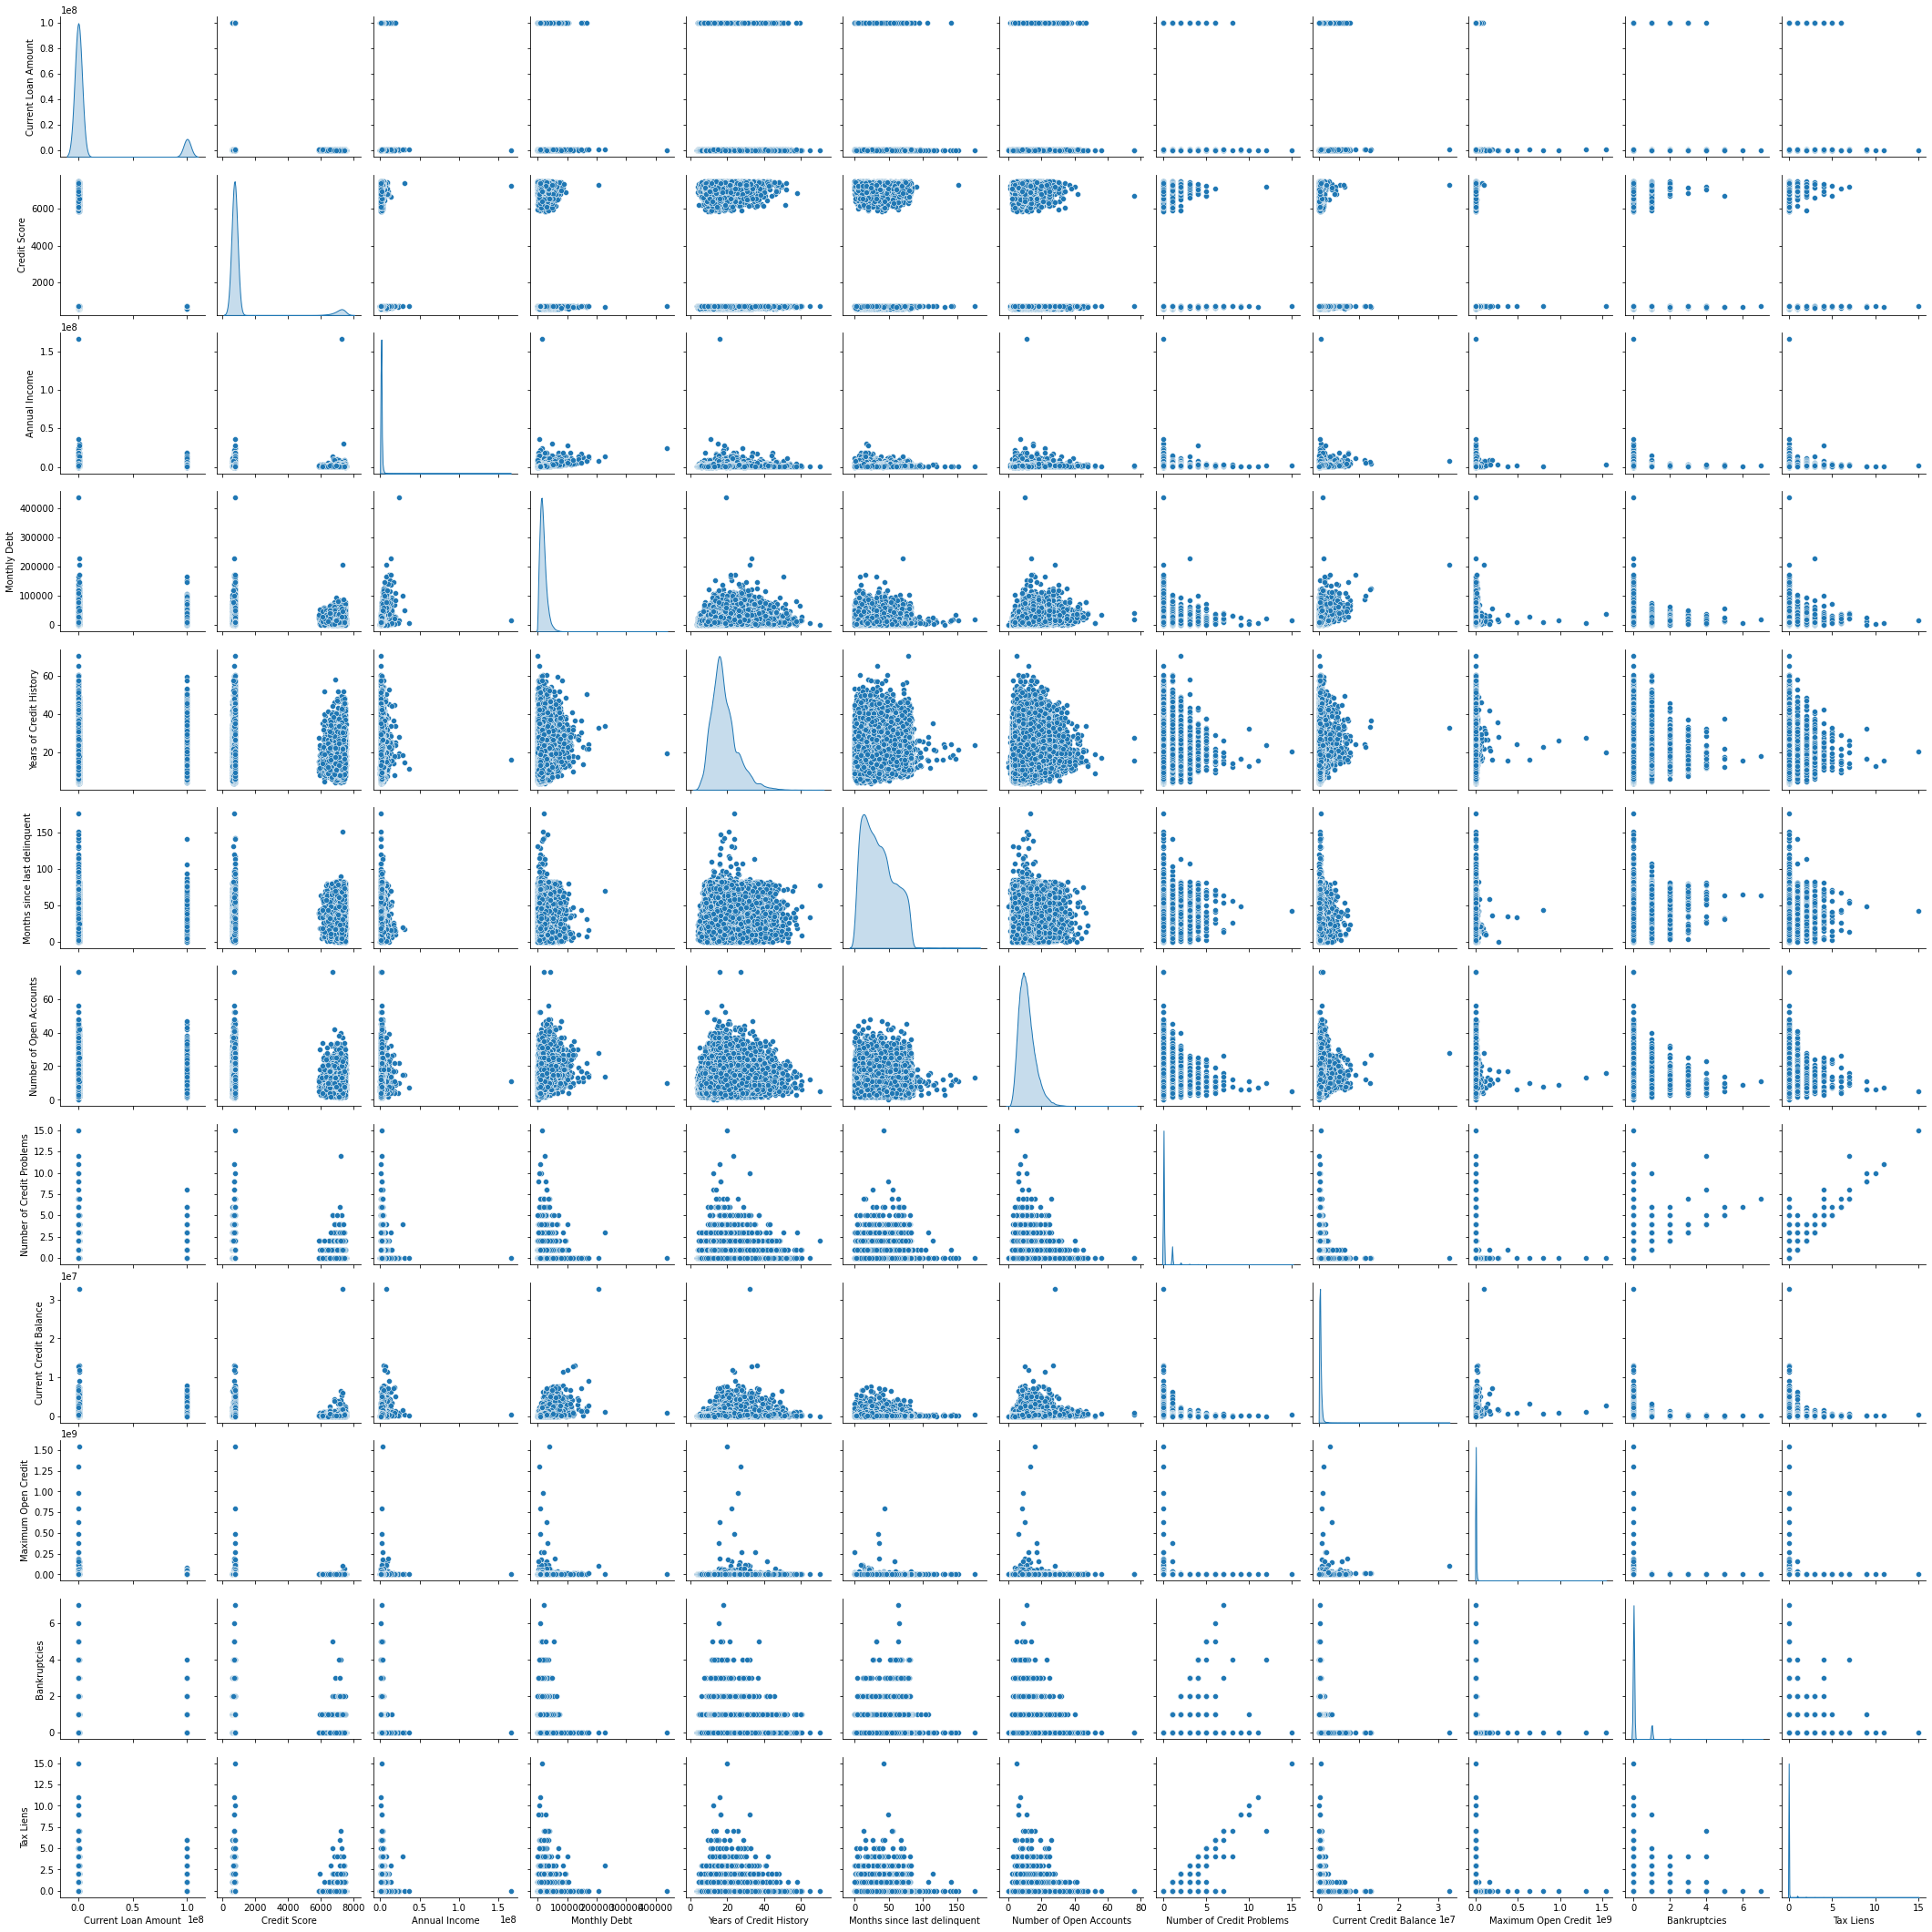

In [62]:
plt.figure(figsize=(10,10))
sns.pairplot(data= df, kind='scatter', diag_kind='kde')

Number of credit problems has high positive correlation with both bankrupts and tax liens.

### Correlation matrix using heatmap

To check relation between the variables a correlation test is neccesary.The value must lie between -1 to +1,here we can observe that diagnolly that corelation is 1 because the correlation of variable itself gives 1. There relationship between variables can be clearly be seen by a heatmap which is given below.

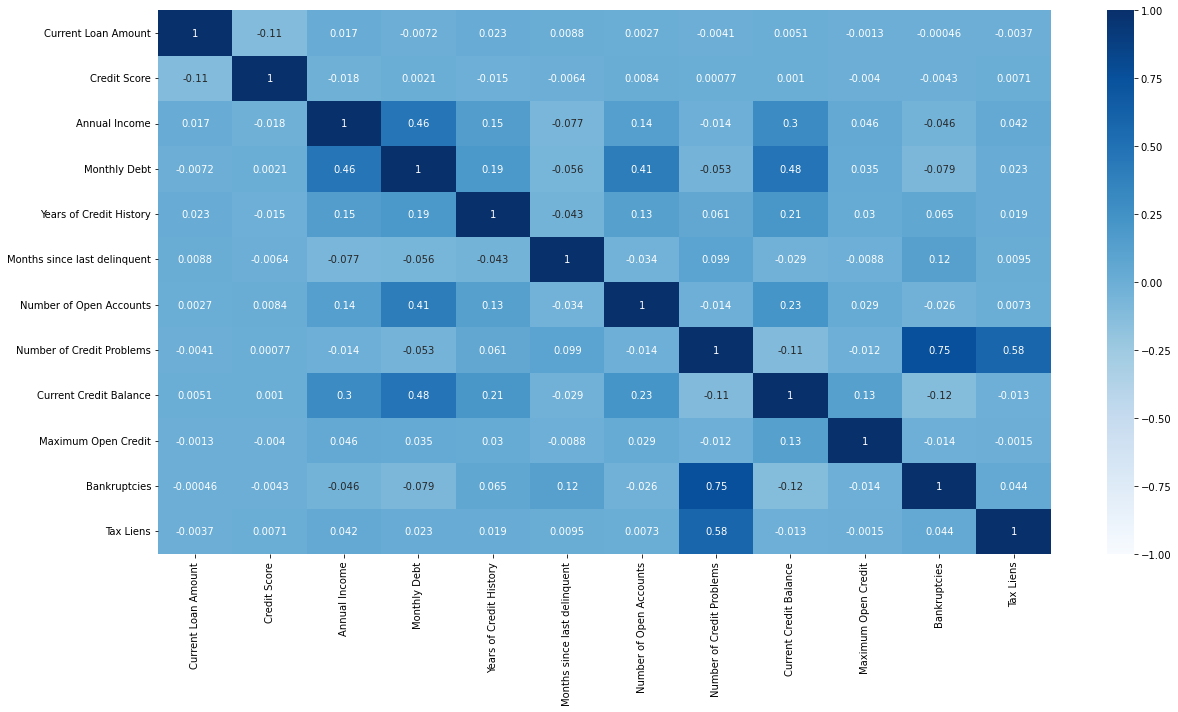

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=+1,cmap="Blues")
plt.show()

The Number of credit Problems and Bankruptcies have higher correlation among them followed by 
Number of credit problems and Tax liens

# Null Values and Missing Values Treatment

## Finding null values and Missing Values in the target feature

In [64]:
percentage=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['Percentage'] )
count=pd.DataFrame(df.isnull().sum(),columns=['Count'])
Missing_values=pd.concat([count,percentage], axis=1)
Missing_values

,Count,Percentage
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,17031,20.769765
Annual Income,17031,20.769765
Years in current job,3508,4.278101
Home Ownership,0,0.000000
Purpose,0,0.000000
Monthly Debt,0,0.000000
Years of Credit History,0,0.000000


There are missing values in Credit Score,Annual Income,Years in current job, Months since last delinquent, Maximum Open Credit, Bankruptcies and Tax Liens

In [65]:
df.shape

(81999, 17)

There are anomalies observed in the 'Credit Score' feature data. 

In [66]:
df['Credit Score'].describe()

count    64968.000000
mean      1168.410741
std       1632.676553
min        585.000000
25%        711.000000
50%        731.000000
75%        743.000000
max       7510.000000
Name: Credit Score, dtype: float64

from above cell we can see that the average Credit Score is not within the range of 300 to 850.

Credit Score typically ranges from 300 to 850. From the below cell we observe that 4551 rows have error in the data, it is present in thousands. We can treat these rows by diving by 10.

In [67]:
df[(df['Credit Score']> 850 )== True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
43,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,NaN,4.0,0.0,132468.0,164406.0,0.0,0.0
51,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,NaN,8.0,0.0,104633.0,199936.0,0.0,0.0
65,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,NaN,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,Charged Off,198572.0,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,NaN,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,Charged Off,110924.0,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,61.0,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,Charged Off,175362.0,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,NaN,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,Charged Off,88968.0,Short Term,6790.0,441845.0,< 1 year,Rent,Other,5375.86,8.5,NaN,10.0,0.0,193306.0,535458.0,0.0,0.0


Treating the data entry error in 'Credit Score'

In [68]:
df['Credit Score'] = df['Credit Score'].apply(lambda x: (x /10) if x > 850 else x)

In [69]:
df['Credit Score'].describe()

count    64968.000000
mean       720.225342
std         27.790618
min        585.000000
25%        708.000000
50%        728.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64

In [70]:
df[(df['Credit Score']> 850 )== True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


From above cells we can observe that the mean of 'Credit Score' is within the range of 300 - 850.

##### Treating missing/null values 

In [71]:
percentage=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['Percentage'] )
count=pd.DataFrame(df.isnull().sum(),columns=['Count'])
Missing_values=pd.concat([count,percentage], axis=1)
Missing_values

,Count,Percentage
Loan Status,0,0.000000
Current Loan Amount,0,0.000000
Term,0,0.000000
Credit Score,17031,20.769765
Annual Income,17031,20.769765
Years in current job,3508,4.278101
Home Ownership,0,0.000000
Purpose,0,0.000000
Monthly Debt,0,0.000000
Years of Credit History,0,0.000000


There are null values present in 'Credit Score', 'Annual Income', 'Years in current job', 'Months since last delinquent', 'Maximum Open Credit', 'Bankruptcies' and 'Tax Liens'.  

Imputing missing value in 'Months since last delinquent' by 0.

In [72]:
df['Months since last delinquent'].fillna(0, inplace=True)

Imputing missing value in 'Bankruptcies' by 0 (high frequency value).

In [73]:
df['Bankruptcies'].fillna(0, inplace=True)

Imputing missing value in 'Tax Liens' by 0 (high frequency value).

In [74]:
df['Tax Liens'].fillna(0, inplace=True)

Dropping null records of 'Maximum Open Credit'. There are only 2 rows with missing value in this feature.

In [75]:
df.shape

(81999, 17)

In [76]:
df = df.drop(df[df['Maximum Open Credit'].isnull()].index)

In [77]:
df.shape

(81997, 17)

cases in Years in current job

1. If annual income is null and years in current job is null, we can assume that years in current job can is also null.
2. If years in current job is null but annual income is not null then we cannot assume anything, so keeping it as 'Unavailable' as it can be assumed that the experience may of freelance or a business.

In [78]:
#Case No.1: Annual income and years in current job is null.
df[df['Years in current job'].isnull()]['Annual Income'].isnull().sum()

730

In [79]:
#Case No.1: Annual income and years in current job is null.
df[(df['Years in current job'].isnull()) & (df['Annual Income'].isnull())].shape[0]

730

There are 730 records having both annual income and years in current job is null.

In [80]:
#Case No.1: For the above 730 records we are substituting by 'None'.
df.loc[((df['Years in current job'].isnull()) & (df['Annual Income'].isnull())), 'Years in current job'] = 'None'

In [81]:
#Case No.2: Years in current job is null but Annual income is not null.
df[(df['Years in current job'].isnull()) & (df['Annual Income'].isnull()==False)].shape[0]

2778

There are 2778 records having Years in current job is null but Annual income is not null.

In [82]:
#Case No.2: For the above 2778 records we are substituting by 'Unavailable'.
df.loc[((df['Years in current job'].isnull()) & (df['Annual Income'].isnull()==False)),'Years in current job'] = 'Unavailable'

In [83]:
df['Years in current job'].isnull().sum()

0

In [84]:
df[df['Credit Score'].isnull() == True].index

Int64Index([    1,     4,     7,    11,    15,    16,    18,    29,    34,
               38,
            ...
            99937, 99943, 99945, 99951, 99960, 99964, 99976, 99982, 99988,
            99989],
           dtype='int64', length=17030)

The number of missing values are same in 'Credit Score' and 'Annual Income'.

In [85]:
# the same number Annual Income and Credit Score Validation for Missing Values
NaNcount_AnnualIncome = df[df['Annual Income'].isnull() == True].index
NaNcount_CreditScore = df[df['Credit Score'].isnull() == True].index

NaNcount = sum(1 for a, b in zip(NaNcount_AnnualIncome, NaNcount_CreditScore) if a == b)
        
print('NaNcount_AnnualIncome length of location information list:',len(NaNcount_AnnualIncome))
print('NaNcount_CreditScorelength of location information list:',len(NaNcount_CreditScore))
print('NaNcount length of location information list:', NaNcount)

NaNcount_AnnualIncome length of location information list: 17030
NaNcount_CreditScorelength of location information list: 17030
NaNcount length of location information list: 17030


If the credit score is null, it can be seen that the annual income is also null. Therefore, it is assumed that no credit score has been given because no income has been generated from economic activities, since credit score is the target feature instead of imputing the missing values for 17K+ records we will be dropping it.

In [86]:
df.shape

(81997, 17)

In [87]:
df = df.drop(df[df['Credit Score'].isnull()].index)            #Dropping null records of Credit Score

In [88]:
df['Credit Score'].isnull().sum()

0

In [89]:
df['Annual Income'].isnull().sum()

0

In [90]:
#by dropping missing records of credit score the missing records of annual income is also handled.
#all the missing values are treated
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [91]:
df.shape

(64967, 17)

Discrepancy in Current Loan amount

In [92]:
df['Current Loan Amount'].describe().astype('int')

count       64967
mean     15176016
std      35511084
min         11242
25%        186362
50%        323444
75%        548856
max      99999999
Name: Current Loan Amount, dtype: int32

High variation is observed in the data

In [93]:
df[df['Current Loan Amount']==99999999].shape[0]

9688

In [94]:
df[(df['Loan Status']=='Charged Off')&(df['Current Loan Amount']==99999999)]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [95]:
df[(df['Loan Status']=='Fully Paid')&(df['Current Loan Amount']==99999999)]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
2,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
10,Fully Paid,99999999.0,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.0,16.0,0.0,203965.0,289784.0,0.0,0.0
12,Fully Paid,99999999.0,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.0,6.0,0.0,134083.0,220220.0,0.0,0.0
13,Fully Paid,99999999.0,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,0.0,10.0,1.0,225549.0,496474.0,1.0,0.0
26,Fully Paid,99999999.0,Short Term,724.0,1029857.0,1 year,Rent,Debt Consolidation,13817.18,12.0,0.0,6.0,0.0,138339.0,221232.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99930,Fully Paid,99999999.0,Short Term,746.0,3553323.0,10+ years,Home Mortgage,Business Loan,29225.99,16.6,0.0,14.0,0.0,988874.0,2400442.0,0.0,0.0
99955,Fully Paid,99999999.0,Long Term,735.0,1111918.0,5 years,Own Home,Debt Consolidation,20755.79,29.5,0.0,18.0,0.0,302290.0,1054284.0,0.0,0.0
99990,Fully Paid,99999999.0,Short Term,742.0,1190046.0,< 1 year,Rent,Other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
99996,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0


In [96]:
df[df['Current Loan Amount']==99999999]['Term'].value_counts(normalize=True)

Short Term    0.833402
Long Term     0.166598
Name: Term, dtype: float64

There are 9688 records of Current Loan amount with this high value of 99999999.
All 9688 records belong to 'Fully Paid' class of Loan Status out of which around 83% of the records belongs to Short Term.
Thus assuming that Current Loan Amount data is corrupted, we are replacing these 9688 records of Current Loan Amount with its the median.

In [97]:
df['Current Loan Amount'].replace(to_replace=99999999, value=df['Current Loan Amount'].median(), inplace=True)

In [98]:
df[df['Current Loan Amount']==99999999]
#now no records with value 99999999 in Current Loan Amount

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [99]:
df['Current Loan Amount'].describe()

count     64967.000000
mean     312062.913756
std      169649.805202
min       11242.000000
25%      186362.000000
50%      323444.000000
75%      392579.000000
max      789250.000000
Name: Current Loan Amount, dtype: float64

In [100]:
percentage=pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['Percentage'] )
count=pd.DataFrame(df.isnull().sum(),columns=['Count'])
Missing_values=pd.concat([count,percentage], axis=1)
Missing_values

,Count,Percentage
Loan Status,0,0.0
Current Loan Amount,0,0.0
Term,0,0.0
Credit Score,0,0.0
Annual Income,0,0.0
Years in current job,0,0.0
Home Ownership,0,0.0
Purpose,0,0.0
Monthly Debt,0,0.0
Years of Credit History,0,0.0


All the missing values are handled.

<a id='OT'></a>
## Outlier Analysis and Treatment

In [101]:
df.shape

(64967, 17)

In [102]:
df_numerical = df.select_dtypes(np.number)
df_numerical.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

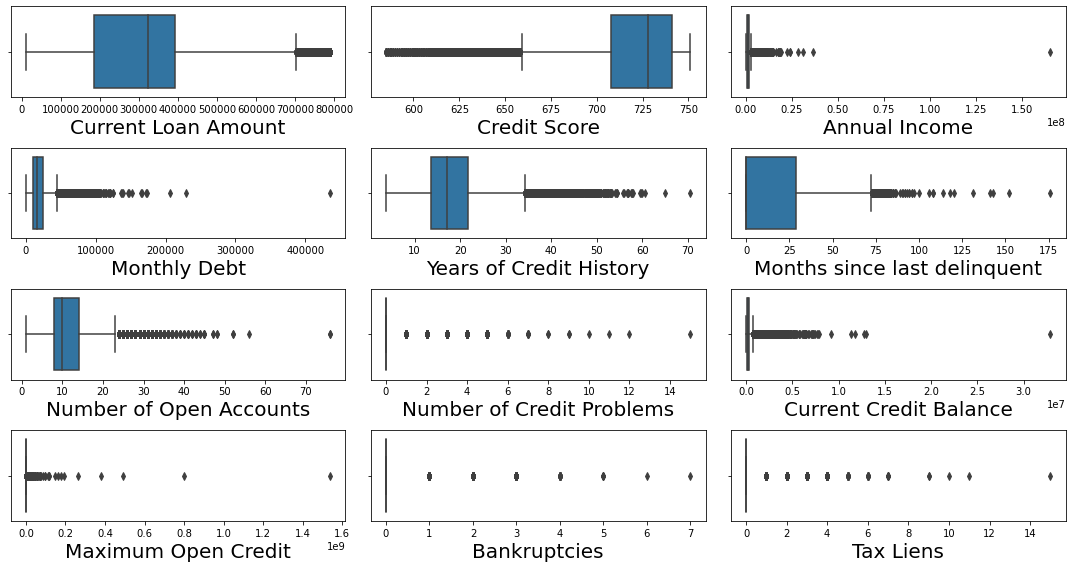

In [103]:
fig, ax = plt.subplots(4, 3, figsize=(15, 8))
for variable, subplot in zip(df_numerical.columns, ax.flatten()):
    z = sns.boxplot(x = df_numerical[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

In [104]:
data = df.copy()
data.head()
data.shape

(64967, 17)

#### Type casting 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens' for treating the outliers only in continuous numeric data. These variables consists of discrete numeric data within a smaller range. Hence, not performing outlier treatment on these variables

In [105]:
data['Months since last delinquent']=data['Months since last delinquent'].astype(str)
data['Months since last delinquent'].dtype

dtype('O')

In [106]:
data['Number of Credit Problems']=data['Number of Credit Problems'].astype(str)
data['Number of Credit Problems'].dtype

dtype('O')

In [107]:
data['Bankruptcies']=data['Bankruptcies'].astype(str)
data['Bankruptcies'].dtype


dtype('O')

In [108]:
data['Tax Liens']=data['Tax Liens'].astype(str)
data['Tax Liens'].dtype

dtype('O')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64967 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   64967 non-null  object 
 1   Current Loan Amount           64967 non-null  float64
 2   Term                          64967 non-null  object 
 3   Credit Score                  64967 non-null  float64
 4   Annual Income                 64967 non-null  float64
 5   Years in current job          64967 non-null  object 
 6   Home Ownership                64967 non-null  object 
 7   Purpose                       64967 non-null  object 
 8   Monthly Debt                  64967 non-null  float64
 9   Years of Credit History       64967 non-null  float64
 10  Months since last delinquent  64967 non-null  object 
 11  Number of Open Accounts       64967 non-null  float64
 12  Number of Credit Problems     64967 non-null  object 
 13  C

In [110]:
Q1 = data['Current Loan Amount'].quantile(0.25)
Q3 = data['Current Loan Amount'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Current Loan Amount'] < (Q1 - 1.5 * IQR)) |(data['Current Loan Amount'] > (Q3 + 1.5 * IQR)))]
data.shape

(62419, 17)

In [111]:
Q1 = data['Annual Income'].quantile(0.25)
Q3 = data['Annual Income'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Annual Income'] < (Q1 - 1.5 * IQR)) |(data['Annual Income'] > (Q3 + 1.5 * IQR)))]
data.shape

(59539, 17)

In [112]:
Q1 = data['Monthly Debt'].quantile(0.25)
Q3 = data['Monthly Debt'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Monthly Debt'] < (Q1 - 1.5 * IQR)) |(data['Monthly Debt'] > (Q3 + 1.5 * IQR)))]

In [113]:
data.shape

(58181, 17)

In [114]:
Q1 = data['Current Credit Balance'].quantile(0.25)
Q3 = data['Current Credit Balance'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Current Credit Balance'] < (Q1 - 1.5 * IQR)) |(data['Current Credit Balance'] > (Q3 + 1.5 * IQR)))]
data.shape

(55570, 17)

In [115]:
Q1 = data['Maximum Open Credit'].quantile(0.25)
Q3 = data['Maximum Open Credit'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['Maximum Open Credit'] < (Q1 - 1.5 * IQR)) |(data['Maximum Open Credit'] > (Q3 + 1.5 * IQR)))]
data.shape

(53396, 17)

In [116]:
df_num = data.select_dtypes(np.number)

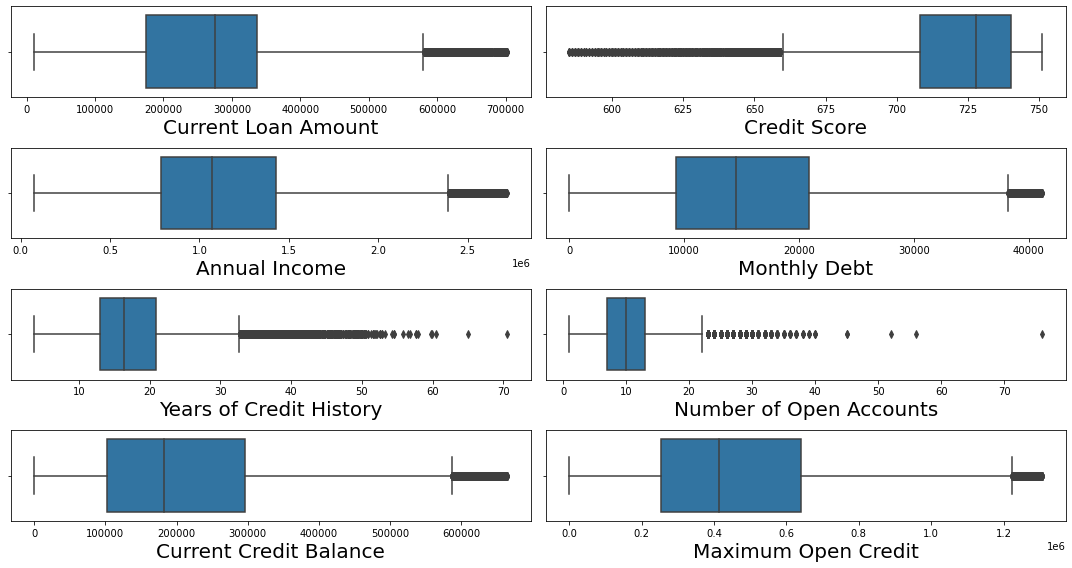

In [117]:
fig, ax = plt.subplots(4,2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 20) 
plt.tight_layout()

As we can observe from above, most of the outliers are removed from these variables

converting back the datatype of 'Number of Credit Problems', 'Bankruptcies', 'Tax Liens' and 'Months since last delinquent'

In [118]:
data['Number of Credit Problems']=data['Number of Credit Problems'].astype(float)
data['Bankruptcies']=data['Bankruptcies'].astype(float)
data['Tax Liens']=data['Tax Liens'].astype(float)
data['Months since last delinquent']=data['Months since last delinquent'].astype(float)

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53396 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   53396 non-null  object 
 1   Current Loan Amount           53396 non-null  float64
 2   Term                          53396 non-null  object 
 3   Credit Score                  53396 non-null  float64
 4   Annual Income                 53396 non-null  float64
 5   Years in current job          53396 non-null  object 
 6   Home Ownership                53396 non-null  object 
 7   Purpose                       53396 non-null  object 
 8   Monthly Debt                  53396 non-null  float64
 9   Years of Credit History       53396 non-null  float64
 10  Months since last delinquent  53396 non-null  float64
 11  Number of Open Accounts       53396 non-null  float64
 12  Number of Credit Problems     53396 non-null  float64
 13  C

In [120]:
data.shape

(53396, 17)

   ## After preprocessing we are left with 53396 rows and 17 columns.

All the null values and outliers are removed from all features.

In [121]:
pd.Index(np.arange(0, len(df))).equals(df.index)

False

In [122]:
df.reset_index(drop=True,inplace=True)

In [123]:
#Checking for indexing
# comparing to plain index
pd.Index(np.arange(0, len(data))).equals(data.index)

False

In [124]:
#Resetting the index
data.reset_index(drop=True,inplace=True)
data

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,Fully Paid,323444.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,Charged Off,206602.0,Short Term,729.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,0.0,6.0,0.0,215308.0,272448.0,0.0,0.0
4,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53391,Fully Paid,323444.0,Short Term,742.0,1190046.0,< 1 year,Rent,Other,11969.81,20.1,16.0,9.0,0.0,37392.0,134442.0,0.0,0.0
53392,Fully Paid,323444.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
53393,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
53394,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,0.0,8.0,0.0,404225.0,738254.0,0.0,0.0


In [125]:
#Correlation check among features
data.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.175642,0.378461,0.335607,0.093458,-0.003967,0.139247,-0.049497,0.374393,0.327461,-0.065886,0.015828
Credit Score,-0.175642,1.000000,0.034829,-0.089812,0.080823,-0.048359,-0.037601,-0.048644,-0.030740,0.139556,-0.034147,-0.019971
Annual Income,0.378461,0.034829,1.000000,0.496568,0.158099,0.066802,0.147735,0.009826,0.267909,0.256005,-0.013538,0.035077
Monthly Debt,0.335607,-0.089812,0.496568,1.000000,0.120434,0.043971,0.398572,-0.021098,0.437504,0.308248,-0.036930,0.018131
Years of Credit History,0.093458,0.080823,0.158099,0.120434,1.000000,0.116358,0.074600,0.095233,0.175924,0.191603,0.103125,0.019450
Months since last delinquent,-0.003967,-0.048359,0.066802,0.043971,0.116358,1.000000,0.055822,0.075391,-0.072779,-0.075151,0.050389,0.027989
Number of Open Accounts,0.139247,-0.037601,0.147735,0.398572,0.074600,0.055822,1.000000,0.013335,0.279283,0.412407,0.006906,0.007751
Number of Credit Problems,-0.049497,-0.048644,0.009826,-0.021098,0.095233,0.075391,0.013335,1.000000,-0.150104,-0.119635,0.765922,0.565474
Current Credit Balance,0.374393,-0.030740,0.267909,0.437504,0.175924,-0.072779,0.279283,-0.150104,1.000000,0.694326,-0.158499,-0.023447
Maximum Open Credit,0.327461,0.139556,0.256005,0.308248,0.191603,-0.075151,0.412407,-0.119635,0.694326,1.000000,-0.127160,-0.015667


To check relation between the variables a correlation test is neccesary.The value must lie betweek -1 to +1,here we can observe that diagnolly that corelation is 1 because the correlation of variable itself gives 1.
There relationship between variables can be clearly be seen by a heatmap which is given below. 

The correlation matrix using heatmap after the missing/null values and outlier treatment

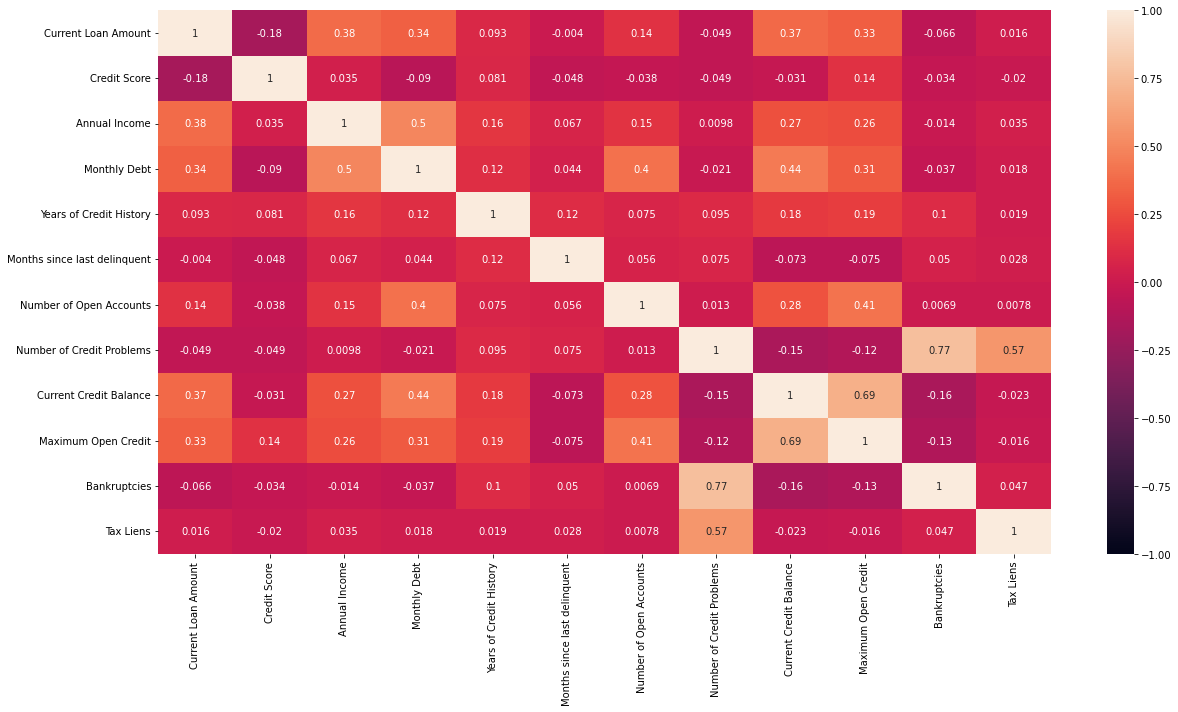

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=+1)
plt.show()

In [127]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,53396.000000,53396.000000,5.339600e+04,53396.000000,53396.000000,53396.000000,53396.000000,53396.000000,53396.000000,5.339600e+04,53396.000000,53396.000000
mean,279607.293018,720.253109,1.148762e+06,15532.482262,17.556965,16.643756,10.519739,0.179864,212898.064068,4.681267e+05,0.130459,0.027231
std,138746.927803,27.099815,4.818937e+05,8391.460763,6.777975,23.268455,4.599955,0.493816,144498.277943,2.797525e+05,0.366426,0.255968
min,11242.000000,585.000000,7.662700e+04,0.000000,3.700000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,174614.000000,708.000000,7.858780e+05,9242.502500,13.000000,0.000000,7.000000,0.000000,102448.000000,2.519385e+05,0.000000,0.000000
50%,275440.000000,728.000000,1.068142e+06,14527.970000,16.400000,0.000000,10.000000,0.000000,182305.000000,4.130280e+05,0.000000,0.000000
75%,336798.000000,740.000000,1.428572e+06,20814.310000,20.900000,30.000000,13.000000,0.000000,296096.000000,6.402495e+05,0.000000,0.000000
max,701888.000000,751.000000,2.719850e+06,41130.820000,70.500000,176.000000,76.000000,15.000000,664316.000000,1.306118e+06,7.000000,15.000000


<a id='MC'></a>
## Multicollinearity

In [128]:
df_num = df.select_dtypes(np.number)
df_num = df_num.drop(['Credit Score'], axis=1)

In [129]:
vif=pd.DataFrame()
vif['VIF_values']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
vif['features']=df_num.columns
vif.sort_values(by='VIF_values',ascending=False)

,VIF_values,features
6,8.915391,Number of Credit Problems
2,5.938384,Monthly Debt
5,5.805495,Number of Open Accounts
9,5.736433,Bankruptcies
3,5.661375,Years of Credit History
0,4.948105,Current Loan Amount
10,3.545048,Tax Liens
1,3.293007,Annual Income
7,2.214978,Current Credit Balance
4,1.508231,Months since last delinquent


In [130]:
#df_num.drop(['Monthly Debt'], axis=1, inplace=True)
#dropping variables in order one by one for without outlier treated dataset based on vif value: 
#1.Number of Credit Problems
#2.Monthly Debt
#3.Years of Credit History


#after dropping all these three variables with highmulticollinearity we are left with 8 variables they are: 
#Current Loan Amount, Number of Open Accounts, Annual Income, Current Credit Balance,Months since last delinquent,Bankruptcies, Tax Liens, Maximum Open Credit

#df_num.drop(['Years of Credit History'], axis=1, inplace=True)
#vif=pd.DataFrame()
#vif['VIF_values']=[variance_inflation_factor(df_num.values,i) for i in range(df_num.shape[1])]
#vif['features']=df_num.columns
#vif.sort_values(by='VIF_values',ascending=False)

VIF = 1, no correlation

VIF > 5 , High correlation

Moderate correlation exists. 

Therefore, multicollinearity is present with high correlation for features :
#1.Number of Credit Problems
#2.Bankruptcies
#3.Number of Open Accounts
#4.Years of Credit History
#5.Months since last delinquent
#6.Monthly Debt.
Therefore we have dropped these features.

In [131]:
df_num = df_num.drop(['Number of Credit Problems','Monthly Debt','Years of Credit History'], axis=1)

In [132]:
df_num.columns

Index(['Current Loan Amount', 'Annual Income', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

<a id='ASBMB'></a>
# Assumptions Before Model Building

## Normality check for Credit Score

Let the significance level be 95%

H0: Credit Score is normally distributed.

H1: Credit Score is normally not distributed.


In [133]:
# Shapiro-Wilk test
from scipy.stats import shapiro
stat, p_value = shapiro(data['Credit Score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.8560044765472412
P-Value: 0.0


From the above result, we can see that the p-value is less than 0.05, thus we can say that the data is not normally distributed. 

Since the target variable Credit Score is not normally distributed. We cannot perform parametric tests instead we will perform the remaining hyothesis using non parametric tests.

# Hypothesis 1 

H0: The mean Credit Score of Defaulters and non-defaulters are same

H1: The mean Credit Score of Defaulters and non-defaulters are not same

In [134]:
#Mann-Whitney U test
group1 =data[data['Loan Status']=='Fully Paid']['Credit Score']
group2 =data[data['Loan Status']=='Charged Off']['Credit Score']
  
# perform mann whitney test
stat, p_value = mannwhitneyu(group1, group2)
print('P-value is:', p_value)

P-value is: 0.0


As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that mean Credit score of Defaulters and non-defaulters is not the same.

# Hypothesis 2

H0: Mean Credit Score of people having Long term loan and short term loan are same.

H1: Mean Credit Score of people having Long term loan and short term loan are not same.


In [135]:
#Mann-Whitney U test

b1 =data[data['Term']=='Long Term']['Credit Score']
b2 =data[data['Term']=='Short Term']['Credit Score']
  
# perform mann whitney test
stat, p_value = mannwhitneyu(b1, b2)
print('P-value is:', p_value)

P-value is: 0.0


As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that mean Credit score of Long term and short term loans are not the same.

# Hypothesis 3

H0:Mean Credit Score of each category of Home Ownership are same.

H1:Mean Credit Score of each category of Home Ownership are not same.

In [136]:
g1 =data[data['Home Ownership']=='Home Mortgage']['Credit Score']
g2 =data[data['Home Ownership']=='Own Home']['Credit Score']
g3 =data[data['Home Ownership']=='Rent']['Credit Score']

#Perform Kruskal test
stat,pval=st.kruskal(g1,g2,g3)
print('Pvalue is:',pval)

Pvalue is: 1.8146898865336931e-59


As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that mean Credit score of each category of Home Ownership are not same.

# Hypothesis 4

A bank claims that the average credit score whose loan status is Fully paid
is greater than the avg credit score of Customers whose loan status is charged off.

Frame a hypothesis and test the claim with 95% confidence.

In [137]:
n1=data[data['Loan Status']=='Fully Paid']['Credit Score']
len(n1)

38936

In [138]:
n2=data[data['Loan Status']=='Charged Off']['Credit Score']
len(n2)

14460

In [139]:
import statistics

# credit score whose loan status is Fully paid
n1=data[data['Loan Status']=='Fully Paid']['Credit Score']

# len of n1
n1_length = len(n1)

# mean of credit score 
n1_mean = np.mean(n1)

# standard deviation of credit score
n1_std = statistics.stdev(n1)

#  credit score of Customers who loan status is charged off
n2=data[data['Loan Status']=='Charged Off']['Credit Score']

#len of n1
n2_length = len(n2)

# mean of credit score 
n2_mean = np.mean(n2)

# standard deviation of credit score
n2_std = statistics.stdev(n2)

In [140]:
# Shapiro-Wilk test
from scipy.stats import shapiro
stat, p_value = shapiro(data['Credit Score'])

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.8560044765472412
P-Value: 0.0


From the above result, we can see that the p-value is less than 0.05, thus we can say that the data is not normally distributed. Thus, we use the non-parmetric mannwhitneyu test for paired data.

H0:  mu1−mu2≤0  


H1:  mu1−mu2>0

In [141]:
from scipy import stats
stats.mannwhitneyu(n1,n2,alternative='greater')

MannwhitneyuResult(statistic=359620505.0, pvalue=0.0)

The p-value is less than 0.05 and hence we to reject  the null hypothesis. Hence we can conclude that the claim made by bank is right.
The average credit score whose loan status is Fully paid is greater than the avg credit score of Customers whose loan status is charged off.

# Hypothesis 5

H0: Average Annual income for people having more than 700 credit score is equal to Average Annual income for people having less than 700 credit score.

m1 = m2 


H1: Average Annual income for people having more than 700 credit score is not equal the Average Annual income for people having less than 700 credit score.

m1!=m2

In [142]:
#700 is considered as very good credit score. Hence we have categorised wrt 700.

In [143]:
#Mann-Whitney U test
group1 =data[data['Credit Score'] > 700]['Annual Income']
group2 =data[data['Credit Score'] < 700]['Annual Income']

# perform mann whitney test
stat, p_value = mannwhitneyu(group1, group2)
print('P-value is:', p_value)

P-value is: 0.4350362824443339


In [144]:
data[data['Credit Score'] > 700]['Annual Income'].shape

(43455,)

In [145]:
data[data['Credit Score'] < 700]['Annual Income'].shape

(9577,)

As the p-value is more than 0.05, null hypothesis is accepted and hence it can be concluded that Avg Annual income for people having more than 700 credit score is equal to Average Annual income for people having less than 700 credit score.
#as we can see there are only around 18% of the people fall under above 700 credit score category where as around 82% of the people are below 700 credit score category so the average income is almost same due to difference of ratio of the people.

# Hypothesis 6

H0: The average Credit Score is same irrespective of years in currebt job.


H1: The average Credit Score is not same irrespective of years in currebt job.

In [146]:
#Kruskal wallis test

In [147]:
data['Years in current job'].value_counts()

10+ years      15469
2 years         5043
< 1 year        4516
3 years         4499
5 years         3748
1 year          3541
4 years         3371
6 years         3179
7 years         3032
Unavailable     2486
8 years         2474
9 years         2038
Name: Years in current job, dtype: int64

In [148]:
data['Years in current job'].unique()

array(['8 years', '3 years', '10+ years', '< 1 year', '2 years',
       '4 years', '1 year', '6 years', '7 years', '9 years',
       'Unavailable', '5 years'], dtype=object)

There are total 11 unique category in 'Years in current job'.

In [149]:
# given data
# total credit Score of 8 years
gr_A = data[data['Years in current job'] == '8 years']['Credit Score']

# total credit Score of 3 years
gr_B = data[data['Years in current job'] == '3 years']['Credit Score']

# total credit Score of 10+ yearss
gr_C = data[data['Years in current job'] == '10+ years']['Credit Score']

# total credit Score of < 1 year
gr_D = data[data['Years in current job'] == '< 1 year']['Credit Score']

# total credit Score of 2 years
gr_E = data[data['Years in current job'] == '2 years']['Credit Score']

# total credit Score of 4 years
gr_F = data[data['Years in current job'] == '4 years']['Credit Score']

# total credit Score of 5 years
gr_G = data[data['Years in current job'] == '5 years']['Credit Score']

# total credit Score of 1 year
gr_H = data[data['Years in current job'] == '1 year']['Credit Score']

# total credit Score of 7 years
gr_I = data[data['Years in current job'] == '7 years']['Credit Score']

# total credit Score of 6 years
gr_J = data[data['Years in current job'] == '6 years']['Credit Score']

# total credit Score of 9 years
gr_K = data[data['Years in current job'] == '9 years']['Credit Score']

# total credit Score of Unavailable years of experience
gr_L = data[data['Years in current job'] == 'Unavailable']['Credit Score']

In [150]:
stat, p_val = kruskal(gr_A, gr_B, gr_C, gr_D, gr_E, gr_F, gr_G, gr_H, gr_I, gr_J, gr_K, gr_L)
print('Statistics=%.3f, p_value=%.2f' % (stat, p_val))

Statistics=34.735, p_value=0.00


As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that Avg Credit Score is not same for all the different categories of 'Years in current job'.

# Hypothesis 7

H0: Mean Credit Score of Bankrupts are less than that of non-Bankrupts 
    
H1: Mean Credit Score of Bankrupts are more than that of non-Bankrupts 

In [151]:
#Mann-Whitney U test
#Non-Bankrupts
group1 =data[data['Bankruptcies'] == 0]['Credit Score']
#Bankrupts
group2 =data[data['Bankruptcies'] != 0]['Credit Score']
# perform mann whitney test
stat, p_value = mannwhitneyu(group2, group1, alternative='greater')
print('P-value is:', p_value)

P-value is: 1.0


As the p-value is more than 0.05, thus failing to reject null hypothesis. Hence it can be concluded that mean Credit score of Bankrupts are less than that of non-Bankrupts.

# Hypothesis 8

H0: Average credit score of people with less than 16000 Monthly debt is less than or equal to the Average credit score of people with more than 16000 Monthly debt.
    
    
H1: Average credit score of people with less than 16000 Monthly debt is more than the Average credit score of people with more than 16000 Monthly debt.


In [152]:
#mean is approximately around 16000 for monthly debt.

In [153]:
#Mann-Whitney U test
#H0: mu1 <= mu2
#H1: mu1 > mu2

In [154]:
group1 =data[data['Monthly Debt'] < 16000]['Credit Score']
group2 =data[data['Monthly Debt'] > 16000]['Credit Score']

# perform mann whitney test
stat, p_value = mannwhitneyu(group1, group2)
print('P-value is:', p_value)

P-value is: 3.271166194163379e-72


As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that Average Credit Score of people with less than 16000 Monthly debt is more than that of the Average credit score of people with more than 16000 Monthly debt.

<a id='HS'></a>
# Hypothesis Summary

<table>
  <tr >
    <th >Hypothesis Test</th>
    <th>Null Hypothesis</th>
    <th>Alternate Hypothesis</th>
    <th>Inferences</th>  
  </tr>
  <tr>
    <td><b>Hypothesis test 1 - Mean Credit score of defaulters and non defaulters (MannWhitneyU test)</b></td>
    <td>The mean Credit Score of Defaulters and non-defaulters are same</td>
    <td>The mean Credit Score of Defaulters and non-defaulters are not same</td>
    <td>As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that <b>mean Credit score of Defaulters and non-defaulters are not the same.</b></td>
  </tr>
  <tr>
    <td><b>Hypothesis test 2 - Mean Credit score of Long term and Short Term loans (MannWhitneyU test)</b></td>
    <td>Mean Credit Score of people having Long term loan and short term loan are same. </td>
    <td>Mean Credit Score of people having Long term loan and short term loan are not same.</td>
    <td>As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that <b>mean Credit score of Long term and short term loans are not the same.</b></td>
  </tr>
    <tr>
    <td><b>Hypothesis test 3 - Credit Score of each category of Home Ownership (Kruskal Test)</b></td>
    <td>Mean Credit Score of each category of Home Ownership are same </td>
    <td>Mean Credit Score of each category of Home Ownership are not same.</td>
    <td>As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that <b>mean Credit score of each category of Home Ownership are not same.</b></td>
  </tr>
    <tr>
    <td><b>Hypothesis test 4 -Average credit score of those with Fully paid loan and charged off loan. (MannWhitneyU test)</b></td>
    <td>Average credit score whose loan status is Fully paid is less than or equal to the avg credit score of Customers whose loan status is charged off.</td>
    <td>Average credit score whose loan status is Fully paid is greater than the avg credit score of Customers whose loan status is charged off.</td>
    <td>  The p-value is less than 0.05 and hence we to reject the null hypothesis. Hence we can conclude that the bank claim was right. <b>The average credit score whose loan status is Fully paid is greater than the avg credit score of Customers whose loan status is charged off.
      </b></td>
  </tr>
    <tr>
    <td><b>Hypothesis test 5 -Average Annual income for people having more than 700 credit score and less than 700 credit score (MannWhitneyU test)</b></td>
    <td> Average Annual income for people having more than 700 credit score is equal to Average Annual income for people having less than 700 credit score </td>
    <td> Average Annual income for people having more than 700 credit score is not equal to Average Annual income for people having less than 700 credit score.</td>
    <td> As the p-value is more than 0.05, null hypothesis is accepted and hence it can be concluded that <b> As the p-value is more than 0.05, null hypothesis is accepted and hence it can be concluded that Avg Annual income for people having more than 700 credit score is equal to Average Annual income for people having less than 700 credit score. </b></td>
  </tr>
    <tr>
    <td><b>Hypothesis test 6 - The average Credit Score for various categories of 'years in currebt job'. (Kruskal wallis test)</b></td>
    <td>The average Credit Score is same irrespective of years in currebt job.</td>
    <td>The average Credit Score is not same irrespective of years in currebt job.</td>
    <td>As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that <b>Avg Credit Score is not same for all the different categories of 'Years in current job'. </b> </td>
  </tr>
    <tr>
    <td><b>Hypothesis test 7 - Mean Credit Score of Bankrupts and non-Bankrupts (MannWhitneyU test)</b></td>
    <td> Mean Credit Score of Bankrupts are less than that of non-Bankrupts</td>
    <td> Mean Credit Score of Bankrupts are more than that of non-Bankrupts</td>
    <td> As the p-value is more than 0.05, thus failing to reject null hypothesis. Hence it can be concluded that <b>Mean Credit score of Bankrupts are less than that of non-Bankrupts. </b></td>
  </tr>
    <tr>
    <td><b>Hypothesis test 8 -Average credit score of people with less than 16000 Monthly debt and more than 16000 Monthly debt. (MannWhitneyU test) </b></td>
    <td>Average credit score of people with less than 16000 Monthly debt is less than or equal to the Average credit score of people with more than 16000 Monthly debt.</td>
    <td>Average credit score of people with less than 16000 Monthly debt is more than the Average credit score of people with more than 16000 Monthly debt.</td>
    <td>As the p-value is less than 0.05, null hypothesis is rejected and hence it can be concluded that <b>Average Credit Score of people with less than 16000 Monthly debt is more than that of the Average credit score of people with more than 16000 Monthly debt.    </b>   </td>
  </tr>
</table>

<a id='FE'></a>
# Feature Engineering

In [155]:
from sklearn.model_selection import train_test_split

### Feature scaling for continuous columns

In [156]:
# After Dropping columns as a result of vif results we are left with 8 variables:
# 'Current Loan Amount', 'Annual Income', 'Months since last delinquent',
#      'Number of Open Accounts', 'Current Credit Balance',
#      'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'

In [157]:
df.select_dtypes(np.number).head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,323444.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
2,347666.0,721.0,806949.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0
3,206602.0,729.0,896857.0,16367.74,17.3,0.0,6.0,0.0,215308.0,272448.0,0.0,0.0
4,217646.0,730.0,1184194.0,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0


In [158]:
df.select_dtypes(np.number).columns


Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [159]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,64967.000000,64967.000000,6.496700e+04,64967.000000,64967.000000,64967.000000,64967.000000,64967.000000,6.496700e+04,6.496700e+04,64967.000000,64967.000000
mean,312062.913756,720.225607,1.376770e+06,18354.614787,18.294563,16.090354,11.125618,0.162913,2.937442e+05,7.641911e+05,0.114073,0.028845
std,169649.805202,27.790749,1.121549e+06,12181.904350,7.042457,22.951817,4.995636,0.478933,3.779431e+05,7.609786e+06,0.346092,0.262365
min,11242.000000,585.000000,7.662700e+04,0.000000,3.700000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,186362.000000,708.000000,8.473050e+05,10151.700000,13.500000,0.000000,8.000000,0.000000,1.132780e+05,2.788720e+05,0.000000,0.000000
50%,323444.000000,728.000000,1.169545e+06,16089.960000,17.000000,0.000000,10.000000,0.000000,2.104250e+05,4.767180e+05,0.000000,0.000000
75%,392579.000000,741.000000,1.649409e+06,23827.330000,21.800000,29.000000,14.000000,0.000000,3.668615e+05,7.967190e+05,0.000000,0.000000
max,789250.000000,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


Out of all 12 numerical columns there are 5 variable which are discrete is nature excluding the target variable.
'Months since last delinquent','Number of Open Accounts', 'Number of Credit Problems', 'Bankruptcies' and 'Tax Liens' these features are discrete in nature.

In [160]:
# without outlier
df_num = df.select_dtypes(np.number)
df_num = df_num.drop('Credit Score',axis=1)
# outlier treated
data_num = data.select_dtypes(np.number)
data_num = data_num.drop('Credit Score',axis=1)

In [161]:
min_max_scaler = MinMaxScaler() 
df_num = pd.DataFrame(min_max_scaler.fit_transform(df_num), columns = df_num.columns)
data_num = pd.DataFrame(min_max_scaler.fit_transform(data_num), columns = data_num.columns)
#without outlier treatment
df_num

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.558053,0.006592,0.011965,0.202096,0.000000,0.066667,0.066667,0.006940,0.000271,0.142857,0.0
1,0.401284,0.013024,0.066998,0.167665,0.164773,0.226667,0.066667,0.009063,0.000487,0.000000,0.0
2,0.432417,0.004413,0.020057,0.124251,0.000000,0.106667,0.000000,0.007796,0.000251,0.000000,0.0
3,0.251103,0.004957,0.037554,0.203593,0.000000,0.066667,0.000000,0.006549,0.000177,0.000000,0.0
4,0.265298,0.006693,0.024906,0.238024,0.056818,0.160000,0.066667,0.003716,0.000177,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...,...
64962,0.401284,0.006728,0.027464,0.245509,0.090909,0.106667,0.000000,0.001137,0.000087,0.000000,0.0
64963,0.401284,0.007329,0.030077,0.085329,0.119318,0.280000,0.000000,0.004655,0.000331,0.000000,0.0
64964,0.118114,0.006490,0.016785,0.226048,0.102273,0.146667,0.066667,0.003332,0.000349,0.142857,0.0
64965,0.667204,0.009916,0.022692,0.169162,0.000000,0.093333,0.000000,0.012294,0.000479,0.000000,0.0


In [162]:
#with outlier treatment
data_num

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.628643,0.412703,0.126784,0.202096,0.000000,0.066667,0.066667,0.343496,0.319072,0.142857,0.0
1,0.452043,0.815393,0.709943,0.167665,0.164773,0.226667,0.066667,0.448576,0.574290,0.000000,0.0
2,0.487115,0.276300,0.212539,0.124251,0.000000,0.106667,0.000000,0.385854,0.296266,0.000000,0.0
3,0.282866,0.310314,0.397943,0.203593,0.000000,0.066667,0.000000,0.324105,0.208594,0.000000,0.0
4,0.298856,0.419021,0.263916,0.238024,0.056818,0.160000,0.066667,0.183903,0.208291,0.142857,0.0
...,...,...,...,...,...,...,...,...,...,...,...
53391,0.452043,0.421235,0.291018,0.245509,0.090909,0.106667,0.000000,0.056286,0.102933,0.000000,0.0
53392,0.452043,0.458830,0.318716,0.085329,0.119318,0.280000,0.000000,0.230380,0.389884,0.000000,0.0
53393,0.133055,0.406291,0.177861,0.226048,0.102273,0.146667,0.066667,0.164912,0.411562,0.142857,0.0
53394,0.751601,0.620794,0.240454,0.169162,0.000000,0.093333,0.000000,0.608483,0.565228,0.000000,0.0


### Dummy encoding for categorical columns

In [163]:
df_cat = df.select_dtypes('O')
data_cat = data.select_dtypes('O')


In [164]:
df_cat.head()

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
1,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
2,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
3,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation
4,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation


In [165]:
df_cat = pd.get_dummies(df_cat, drop_first = True)

In [166]:
data_cat = pd.get_dummies(data_cat, drop_first = True)

In [167]:
df_cat.shape

(64967, 29)

In [168]:
data_cat.shape

(53396, 29)

In [169]:
df_cat.columns

Index(['Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

In [170]:
data_cat.columns

Index(['Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years', 'Years in current job_< 1 year',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Educational Expenses',
       'Purpose_Home Improvements', 'Purpose_Medical Bills', 'Purpose_Other',
       'Purpose_Take a Trip', 'Purpose_major_purchase', 'Purpose_moving',
       'Purpose_renewable_energy', 'Purpose_small_business',
       'Purpose_vacation', 'Purpose_wedding'],
      dtype='object')

Sanity check performed for ordering of columns. No issues found.

In [171]:
#without outlier treatment
df_final = pd.concat([df_num, df_cat], axis=1)
#with outlier treatment
data_final = pd.concat([data_num, data_cat], axis=1)

In [172]:
print(df_final.shape,data_final.shape)

(64967, 40) (53396, 40)


In [173]:
data_final.isnull().sum()

Current Loan Amount                 0
Annual Income                       0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
Loan Status_Fully Paid              0
Term_Short Term                     0
Years in current job_10+ years      0
Years in current job_2 years        0
Years in current job_3 years        0
Years in current job_4 years        0
Years in current job_5 years        0
Years in current job_6 years        0
Years in current job_7 years        0
Years in current job_8 years        0
Years in current job_9 years        0
Years in current job_< 1 year       0
Years in current job_Unavailable    0
Home Ownership_Own Home             0
Home Ownership_Rent                 0
Purpose_Buy 

In [174]:
#without outlier treated data
#X = df_final.drop('Credit Score',axis=1)
X = df_final
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print('The shape of X_train is:',X_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (45476, 40)
The shape of X_test is: (19491, 40)
The shape of y_train is: (45476,)
The shape of y_test is: (19491,)


In [175]:
#with outlier treatment
X_out = data_final
y_out = data['Credit Score']
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size = 0.3, random_state=0)
print('The shape of X_train is:',X_train_out.shape)
print('The shape of X_test is:',X_test_out.shape)
print('The shape of y_train is:',y_train_out.shape)
print('The shape of y_test is:',y_test_out.shape)

The shape of X_train is: (37377, 40)
The shape of X_test is: (16019, 40)
The shape of y_train is: (37377,)
The shape of y_test is: (16019,)


<a id='mod'></a>
# Modelling

<a id='ols'></a>
### OLS Model with and without Outliers

In [176]:
#Outlier treated data
import statsmodels.api as sm
x=X_train_out
y=y_train_out
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit Score   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     493.7
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:            -1.6856e+05
No. Observations:               37377   AIC:                         3.372e+05
Df Residuals:                   37336   BIC:                         3.376e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [177]:
#without outlier treated data
#dropping the following 3 features according to vif values
#1.Number of Credit Problems
#2.Monthly Debt
#3.Years of Credit History
import statsmodels.api as sm
x=X_train_out.drop(['Number of Credit Problems','Monthly Debt','Years of Credit History'],axis=1)
y=y_train_out
x = sm.add_constant(x)
  
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
  
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit Score   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     517.5
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:            -1.6876e+05
No. Observations:               37377   AIC:                         3.376e+05
Df Residuals:                   37339   BIC:                         3.379e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [178]:
# Since Durbin-Watson value is nearly 2 i.e; 2.004 almost no autocorrelation.
#Jarque-Bera (JB) value is very high so this shows data is not normal.
# The model shows 33.9% Accuracy. Hence the model is poor and it does not follow the assumptions of linearity.
#Since the condition number is very high. This shows the presence of multicollinearity.

In [179]:
# explained variation is around 33.9%. Hence the model is Moderate.
# explained variation is around 34.6% for outlier treated data. Hence the model is Moderate.

In [ ]:
#Since dropping the 3 features found from vif analysis is not improving the results. Hence not dropping for further modelling.

In [180]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [181]:
#dropping
#1.Number of Credit Problems
#2.Monthly Debt
#3.Years of Credit History
#X_train_out.drop(['Monthly Debt','Years of Credit History'],axis=1,inplace=True)
#X_test_out.drop(['Monthly Debt','Years of Credit History'],axis=1,inplace=True)

<a id='dtr'></a>
# Decision Tree Regressor

### Outlier treated data DecisionTreeRegressor

In [182]:
#Outlier treated data
x=X_train_out
y=y_train_out

dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [183]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [184]:
dtr.score(x,y)

1.0

In [185]:
dtr.score(X_test_out,y_test_out)

-0.3182089947774236

In [186]:
imp_feature = pd.DataFrame({'feature': X_train_out.columns, 'Importance': dtr.feature_importances_})
imp_feature.sort_values('Importance', ascending=False)

,feature,Importance
12,Term_Short Term,2.289978e-01
8,Maximum Open Credit,1.184758e-01
7,Current Credit Balance,1.026344e-01
0,Current Loan Amount,8.909215e-02
1,Annual Income,8.734199e-02
3,Years of Credit History,7.774271e-02
2,Monthly Debt,7.264824e-02
5,Number of Open Accounts,5.107976e-02
4,Months since last delinquent,4.035256e-02
11,Loan Status_Fully Paid,1.474645e-02


In [187]:
y_outlier_pred=pd.DataFrame(dtr.predict(X_test_out), columns=['Credit Score'])

In [188]:
act = y_test_out
act=act.reset_index(drop=True)

In [189]:
pd.concat([act,y_outlier_pred],axis=1)

,Credit Score,Credit Score
0,715.0,745.0
1,689.0,720.0
2,741.0,742.0
3,742.0,739.0
4,738.0,740.0
...,...,...
16014,741.0,716.0
16015,682.0,744.0
16016,748.0,748.0
16017,744.0,736.0


In [190]:
from sklearn.feature_selection import RFE
x=X_train_out
y=y_train_out
rfe=RFE(estimator=DecisionTreeRegressor(),n_features_to_select=10)
rfe.fit(x,y)
f_index=pd.Series(rfe.ranking_,index=x.columns)
f_index[f_index==1].index

Index(['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Term_Short Term', 'Purpose_Debt Consolidation'],
      dtype='object')

In [191]:
x=X_train_out[['Current Loan Amount', 'Annual Income', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Home Ownership_Rent', 'Purpose_Debt Consolidation',
       'Months since last delinquent', 'Bankruptcies']]
y=y_train_out

In [192]:
# from sklearn.model_selection import GridSearchCV
# parameters={"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt"],
#            "max_leaf_nodes":[10,20,30,40,50,60,70,80,90]}
 
# dtr = DecisionTreeRegressor(random_state = 42)

# tree_grid = GridSearchCV(estimator = dtr,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)

# tree_grid_model = tree_grid.fit(x, y)
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [193]:
#Results from grid search cv
#Best parameters for decision tree classifier:  {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None,
# 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'} 

In [194]:
rf_model = DecisionTreeRegressor(max_depth= 5, max_features= 'auto', max_leaf_nodes= None, 
                                 min_samples_leaf= 1, min_weight_fraction_leaf= 0.1, splitter= 'best')

x=X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Annual Income', 'Months since last delinquent']]
y=y_train_out
# use fit() to fit the model on the train set
rf_model = rf_model.fit(x, y)

print('score on train',rf_model.score(x,y))

score on train 0.2646585206315696


In [195]:
x=X_test_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Annual Income', 'Months since last delinquent']]
y=y_test_out
print('score on test',rf_model.score(x,y))

score on test 0.255860184637544


# without outlier removal DecisionTreeRegressor

In [196]:
# without outlier removal
x=X_train
y=y_train
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [197]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [198]:
dtr.score(x,y)

1.0

In [199]:
dtr.score(X_test,y_test)

-0.25702864725043484

In [200]:
y_pred=pd.DataFrame(dtr.predict(X_test),columns=['Credit Score'])

In [201]:
y_pred.head()

,Credit Score
0,742.0
1,720.0
2,684.0
3,746.0
4,746.0


In [202]:
act = pd.DataFrame(y_test, columns=['Credit Score'])
act.reset_index(drop=True, inplace=True)

In [203]:
pd.concat([act,y_pred],axis=1)

,Credit Score,Credit Score
0,745.0,742.0
1,744.0,720.0
2,745.0,684.0
3,739.0,746.0
4,671.0,746.0
...,...,...
19486,733.0,704.0
19487,748.0,647.0
19488,724.0,734.0
19489,730.0,725.0


In [204]:
x=X_train[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_< 1 year',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_Debt Consolidation', 'Purpose_Other',
       'Months since last delinquent', 'Bankruptcies']]
y=y_train

In [205]:
rf_model = DecisionTreeRegressor(max_depth = 5,
                                  min_samples_split = 350,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x, y)

print('score on train',rf_model.score(x,y))

score on train 0.3168153275396989


In [206]:
x=X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_< 1 year',
       'Home Ownership_Own Home', 'Home Ownership_Rent',
       'Purpose_Debt Consolidation', 'Purpose_Other',
       'Months since last delinquent', 'Bankruptcies']]
y=y_test
print('score on test',rf_model.score(x,y))

score on test 0.2952608851980173


<a id='rfr'></a>
# Random Forest Regressor 

## outlier Treated Data RandomForestRegressor

In [207]:
#Outlier treated data

x=X_train_out
y=y_train_out

rfr=RandomForestRegressor(random_state=0)
rfr.fit(x,y)

RandomForestRegressor(random_state=0)

In [208]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [209]:
rfr.score(x,y)

0.9104168025089541

In [210]:
rfr.score(X_test_out,y_test_out)

0.3582537503281077

In [211]:
y_pred_out=pd.DataFrame(rfr.predict(X_test_out),columns=['Credit Score'])

In [212]:
y_pred_out.head()

,Credit Score
0,729.30
1,704.39
2,731.22
3,722.45
4,733.01


In [213]:
y_test.shape

(19491,)

In [214]:
act_out = pd.DataFrame(y_test_out, columns=['Credit Score'])
act_out.reset_index(drop=True, inplace=True)

In [215]:
pd.concat([act_out,y_pred_out],axis=1)

,Credit Score,Credit Score
0,715.0,729.30
1,689.0,704.39
2,741.0,731.22
3,742.0,722.45
4,738.0,733.01
...,...,...
16014,741.0,729.31
16015,682.0,730.85
16016,748.0,735.64
16017,744.0,712.58


# These 16 features are selected by extra Tree Regressor 

In [216]:
x=X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_train_out

In [217]:
from sklearn.model_selection import GridSearchCV
tuned_paramaters = [{'max_depth': [3,5,7,9],
                     'min_samples_split': range(2,20), 'max_features':['auto', 'sqrt', 'log2', 'int', 'float'], 
                    'n_estimators':[100,150,200,250,300,350], 'min_samples_leaf':range(1,10)}]
 
rfr = RandomForestRegressor(random_state = 10)

tree_grid = GridSearchCV(estimator = rfr, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(x, y)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

KeyboardInterrupt: 

In [218]:
rf_model = RandomForestRegressor(max_depth =3, max_features='auto',
                                  min_samples_split = 20,min_samples_leaf=1,max_leaf_nodes=25,
                                  random_state = 5,n_estimators=100)

x=X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_train_out
# use fit() to fit the model on the train set
rf_model = rf_model.fit(x, y)

print('score on train',rf_model.score(x,y))

score on train 0.2806221187737489


In [219]:
x=X_test_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_test_out
print('score on test',rf_model.score(x,y))

score on test 0.27338365617145244


In [220]:
#outlier treated data
rf_model = RandomForestRegressor(max_depth = 9,
                                  min_samples_split = 100,
                                  random_state = 10)
rf_model = rf_model.fit(X_train_out, y_train_out)

print('score on train',rf_model.score(X_train_out, y_train_out))
print('score on test',rf_model.score(X_test_out, y_test_out))

score on train 0.4089568193356429
score on test 0.3456285181631692


# without outlier removal RandomForestRegressor

In [221]:
# without outlier removal
x=X_train[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_train

rfr=RandomForestRegressor(random_state=0)
rfr.fit(x,y)

RandomForestRegressor(random_state=0)

In [222]:
rfr.score(x,y)

0.9103568499809923

In [224]:
x=X_test[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_test
rfr.score(x,y_test)

0.36042042362729687

In [225]:
y_pred=pd.DataFrame(rfr.predict(x),columns=['Credit Score predicted'])
y_pred.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
pd.concat([y_test,y_pred],axis=1).head()

,Credit Score,Credit Score predicted
0,745.0,724.67
1,744.0,725.29
2,745.0,710.93
3,739.0,727.31
4,671.0,721.78


In [226]:
x=X_train[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_train

In [227]:
rf_model = RandomForestRegressor(max_depth = 9,
                                  min_samples_split = 100,
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(x, y)

print('score on train',rf_model.score(x, y))

score on train 0.4127841668840353


In [228]:
x=X_test[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years']]
y=y_test
print('score on test',rf_model.score(x, y))

score on test 0.35068507619612854


In [229]:
rf_model = RandomForestRegressor(max_depth = 9,
                                  min_samples_split = 100,
                                  random_state = 10)
rf_model = rf_model.fit(X_train, y_train)

print('score on train',rf_model.score(X_train, y_train))
print('score on test',rf_model.score(X_test, y_test))

score on train 0.4239110755717542
score on test 0.35952060970231403


<a id='boost'></a>
# Boosting

In [230]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

In [231]:
print(df_final.shape,data_final.shape)

(64967, 40) (53396, 40)


In [232]:
X = df_final
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print('The shape of X_train is:',X_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (45476, 40)
The shape of X_test is: (19491, 40)
The shape of y_train is: (45476,)
The shape of y_test is: (19491,)


<a id='ada'></a>
# Adaboost

## Adaboost for with outliers

In [ ]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':range(10,100,10),'learning_rate':[.001,0.01,.1,1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,n_jobs=2,cv=5)

#n_jobsint=Number of jobs to run in parallel. None means 1 unless in a joblib.
# parallel_backend context. -1 means using all processors.

search.fit(X_train, y_train)
search.best_params_

In [233]:
# The besr parameters from the above grid search is n_estimators = 10, random_state = 10,learning_rate=0.001

In [234]:
ada_model = AdaBoostRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)

ada_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [235]:
ada_model.score(X_train, y_train)

0.2891878826181943

In [236]:
ada_model.score(X_test, y_test)

0.27665444897436886

In [237]:
a=ada_model.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=X_train.columns
f.sort_values('values',ascending=False)

,values,features
12,0.819003,Term_Short Term
8,0.101233,Maximum Open Credit
0,0.057969,Current Loan Amount
11,0.012652,Loan Status_Fully Paid
28,0.006324,Purpose_Debt Consolidation
32,0.002819,Purpose_Other
24,0.000000,Home Ownership_Own Home
25,0.000000,Home Ownership_Rent
26,0.000000,Purpose_Buy House
27,0.000000,Purpose_Buy a Car


# RFE on data with outliers

In [247]:
from sklearn.feature_selection import RFE
x=X_train
y=y_train
rfe_ada=RFE(estimator=AdaBoostRegressor(),n_features_to_select=15)
rfe_ada.fit(x,y)
f_index=pd.Series(rfe_ada.ranking_,index=x.columns)
f_index[f_index==1].index

Index(['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_small_business'],
      dtype='object')

though increased in n_features_to_select to score is not varying much 

In [238]:
rfe_X_train=X_train[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Home Ownership_Rent',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_small_business']]

rfe_X_test=X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Home Ownership_Rent',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_small_business']]
print(rfe_X_train.shape,rfe_X_test.shape)

(45476, 15) (19491, 15)


In [239]:
rfe_ada_model = AdaBoostRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)


rfe_ada_model.fit(rfe_X_train, y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [240]:
print(rfe_ada_model.score(rfe_X_train, y_train))
print(rfe_ada_model.score(rfe_X_test, y_test))

0.28984456665638525
0.27725426171470613


In [241]:
a=rfe_ada_model.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=rfe_X_train.columns
f.sort_values('values',ascending=False)

,values,features
9,0.819300,Term_Short Term
7,0.102454,Maximum Open Credit
0,0.057985,Current Loan Amount
8,0.014093,Loan Status_Fully Paid
13,0.006169,Purpose_Debt Consolidation
1,0.000000,Annual Income
2,0.000000,Monthly Debt
3,0.000000,Years of Credit History
4,0.000000,Months since last delinquent
5,0.000000,Number of Open Accounts


# AdaBoost on outlier treated data

In [242]:
X_out = data_final
y_out = data['Credit Score']
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size = 0.3, random_state=0)
print('The shape of X_train is:',X_train_out.shape)
print('The shape of X_test is:',X_test_out.shape)
print('The shape of y_train is:',y_train_out.shape)
print('The shape of y_test is:',y_test_out.shape)

The shape of X_train is: (37377, 40)
The shape of X_test is: (16019, 40)
The shape of y_train is: (37377,)
The shape of y_test is: (16019,)


In [243]:
ada_model_out = AdaBoostRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)


ada_model_out.fit(X_train_out, y_train_out)

AdaBoostRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [244]:
print(ada_model_out.score(X_train_out, y_train_out))
print(ada_model_out.score(X_test_out, y_test_out))

0.2758853696026208
0.2691707012822854


In [245]:
a=ada_model_out.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=X_train_out.columns
f.sort_values('values',ascending=False)

,values,features
12,0.831422,Term_Short Term
8,0.103759,Maximum Open Credit
11,0.030936,Loan Status_Fully Paid
0,0.021096,Current Loan Amount
28,0.005311,Purpose_Debt Consolidation
7,0.003966,Current Credit Balance
32,0.001416,Purpose_Other
3,0.001309,Years of Credit History
5,0.000784,Number of Open Accounts
37,0.000000,Purpose_small_business


# RFE on Outlier treated data

In [246]:
from sklearn.feature_selection import RFE
x=X_train_out
y=y_train_out
rfe_ada=RFE(estimator=AdaBoostRegressor(),n_features_to_select=10)
rfe_ada.fit(x,y)
f_index=pd.Series(rfe_ada.ranking_,index=x.columns)
f_index[f_index==1].index

Index(['Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_small_business'],
      dtype='object')

In [248]:
rfe_X_train_out=X_train_out[['Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_small_business']]

rfe_X_test_out=X_test_out[['Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Purpose_Buy House', 'Purpose_Debt Consolidation',
       'Purpose_small_business']]
print(rfe_X_train_out.shape,rfe_X_test_out.shape)

(37377, 10) (16019, 10)


In [249]:
rfe_ada_model_out = AdaBoostRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)

rfe_ada_model_out.fit(rfe_X_train_out, y_train_out)

AdaBoostRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [250]:
print(rfe_ada_model_out.score(rfe_X_train_out, y_train_out))
print(rfe_ada_model_out.score(rfe_X_test_out, y_test_out))

0.2745297343501665
0.2681544034429739


In [251]:
a=rfe_ada_model_out.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=rfe_X_train_out.columns
f.sort_values('values',ascending=False)

,values,features
6,0.831484,Term_Short Term
4,0.103764,Maximum Open Credit
5,0.029123,Loan Status_Fully Paid
0,0.021906,Current Loan Amount
8,0.008436,Purpose_Debt Consolidation
3,0.003974,Current Credit Balance
1,0.001314,Years of Credit History
2,0.000000,Number of Open Accounts
7,0.000000,Purpose_Buy House
9,0.000000,Purpose_small_business


<a id='gb'></a>
# Gradient Boosting

## Gradient Boosting on the data with outliers 

In [252]:
print('The shape of X_train is:',X_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (45476, 40)
The shape of X_test is: (19491, 40)
The shape of y_train is: (45476,)
The shape of y_test is: (19491,)


shape is cross check the data is consistent everywhere

In [253]:
gb_model = GradientBoostingRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)

# fit the model using fit() on train data
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [254]:
print(gb_model.score(X_train, y_train))
print(gb_model.score(X_test, y_test))

0.005674824296758141
0.005530893251812441



# Gradient Boosting without outliers 

In [255]:
print('The shape of X_train is:',X_train_out.shape)
print('The shape of X_test is:',X_test_out.shape)
print('The shape of y_train is:',y_train_out.shape)
print('The shape of y_test is:',y_test_out.shape)

The shape of X_train is: (37377, 40)
The shape of X_test is: (16019, 40)
The shape of y_train is: (37377,)
The shape of y_test is: (16019,)


shape is cross check the data is consistent everywhere

In [256]:
gb_model_out= GradientBoostingRegressor(n_estimators = 10, random_state = 10,learning_rate=0.001)


gb_model_out.fit(X_train_out, y_train_out)

GradientBoostingRegressor(learning_rate=0.001, n_estimators=10, random_state=10)

In [257]:
print(gb_model_out.score(X_train_out, y_train_out))
print(gb_model_out.score(X_test_out, y_test_out))

0.005391932543006961
0.005370273906992407


Gradient boosting is not giving the good score 

<a id='xgb'></a>
# XGBoost Regressor

### RFE_XGBoosting on data with outliers

In [258]:
print('The shape of X_train is:',X_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of y_test is:',y_test.shape)

The shape of X_train is: (45476, 40)
The shape of X_test is: (19491, 40)
The shape of y_train is: (45476,)
The shape of y_test is: (19491,)


shape is cross check the data is consistent everywhere

In [ ]:
from sklearn.feature_selection import RFE
x=X_train
y=y_train
rfe_xgb=RFE(estimator=XGBRegressor(),n_features_to_select=20)
rfe_xgb.fit(x,y)
f_index=pd.Series(rfe_xgb.ranking_,index=x.columns)
f_index[f_index==1].index

In [275]:
rfe_X_train=X_train[['Current Loan Amount', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_major_purchase',
       'Purpose_small_business']]

rfe_X_test=X_test[['Current Loan Amount', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_major_purchase',
       'Purpose_small_business']]
print(rfe_X_train.shape,rfe_X_test.shape)

(45476, 20) (19491, 20)


## Randomized Search CV on XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBRegressor()


xgb_grid = RandomizedSearchCV(estimator = xgb_model, param_distributions = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}, cv = 5)

xgb_grid.fit(rfe_X_train_out, y_train_out)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')


In [ ]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


xgb_model = XGBRegressor()


xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 5)

xgb_grid.fit(rfe_X_train, y_train)

print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

max_depth = 8, gamma = 4,learning_rate=0.1

In [276]:
xgb_model = XGBRegressor(max_depth = 8, gamma = 4,learning_rate=0.1)
xgb_model.fit(rfe_X_train_out, y_train_out)

print(xgb_model.score(rfe_X_train_out, y_train_out))
print(xgb_model.score(rfe_X_test_out, y_test_out))

0.5295232529679286
0.3410996489199516


In [277]:
a=xgb_model.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=rfe_X_train_out.columns
f.sort_values('values',ascending=False)

,values,features
6,0.732174,Term_Short Term
8,0.052733,Purpose_Debt Consolidation
5,0.052448,Loan Status_Fully Paid
4,0.029698,Maximum Open Credit
7,0.026524,Purpose_Buy House
3,0.025904,Current Credit Balance
9,0.023417,Purpose_small_business
2,0.019379,Number of Open Accounts
0,0.019374,Current Loan Amount
1,0.018347,Years of Credit History


In [278]:
b=f['features'][:20].values

In [279]:
features_X_train=X_train[b]

features_X_test=X_test[b]
print(features_X_test.shape,features_X_test.shape)

(19491, 10) (19491, 10)


In [280]:
feautures_xgb_model = XGBRegressor(max_depth = 3, gamma = 0.2,learning_rate=0.2)


feautures_xgb_model.fit(rfe_X_train, y_train)

print(feautures_xgb_model.score(rfe_X_train, y_train))
print(feautures_xgb_model.score(rfe_X_test, y_test))

0.4267187093534538
0.39241660042071513


# RFE XGBoosting on without outliers

In [281]:
print('The shape of X_train is:',X_train_out.shape)
print('The shape of X_test is:',X_test_out.shape)
print('The shape of y_train is:',y_train_out.shape)
print('The shape of y_test is:',y_test_out.shape)

The shape of X_train is: (37377, 40)
The shape of X_test is: (16019, 40)
The shape of y_train is: (37377,)
The shape of y_test is: (16019,)


In [ ]:
from sklearn.feature_selection import RFE
x=X_train_out
y=y_train_out
rfe_xgb_out=RFE(estimator=XGBRegressor(),n_features_to_select=25)
rfe_xgb_out.fit(x,y)
f_index=pd.Series(rfe_xgb_out.ranking_,index=x.columns)
f_index[f_index==1].index

In [283]:
rfe_X_train_out=X_train_out[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_major_purchase',
       'Purpose_moving', 'Purpose_small_business']]

rfe_X_test_out=X_test_out[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_major_purchase',
       'Purpose_moving', 'Purpose_small_business']]
print(rfe_X_train_out.shape,rfe_X_test_out.shape)

(37377, 25) (16019, 25)


In [284]:
xgb_model_out = XGBRegressor(max_depth = 3, gamma = 0,learning_rate=0.2)
# the above parameters used are taken from GridSearchCV on the data with outliers


xgb_model_out.fit(rfe_X_train_out, y_train_out)

print(xgb_model_out.score(rfe_X_train_out, y_train_out))
print(xgb_model_out.score(rfe_X_test_out, y_test_out))

0.41893698022164594
0.3851973053342892


In [285]:
a=xgb_model_out.feature_importances_
f=pd.DataFrame()
f['values']=a
f['features']=rfe_X_train_out.columns
f.sort_values('values',ascending=False)

,values,features
12,0.449544,Term_Short Term
11,0.088984,Loan Status_Fully Paid
21,0.058821,Purpose_Other
15,0.047464,Home Ownership_Rent
18,0.032013,Purpose_Debt Consolidation
8,0.030415,Maximum Open Credit
4,0.025426,Months since last delinquent
6,0.024839,Number of Credit Problems
0,0.024223,Current Loan Amount
7,0.022667,Current Credit Balance


In [286]:
## Feature selection by ExtraTreesRegressor(model based)
from sklearn.ensemble import ExtraTreesRegressor

In [287]:
reg= ExtraTreesRegressor()
reg.fit(X_train_out,y_train_out)
reg.feature_importances_

array([6.83289503e-02, 5.94198239e-02, 5.54205401e-02, 6.28729395e-02,
       4.61234477e-02, 6.14159863e-02, 1.35167796e-02, 7.24278028e-02,
       9.28033480e-02, 1.18114843e-02, 3.98577562e-03, 1.66779675e-02,
       2.28997777e-01, 1.97038475e-02, 1.43480585e-02, 1.31877046e-02,
       1.15506710e-02, 1.18241839e-02, 1.18596325e-02, 1.19527321e-02,
       9.47085920e-03, 9.01192452e-03, 1.39979618e-02, 9.08214199e-03,
       1.16383019e-02, 1.53677195e-02, 3.21829255e-03, 2.98329611e-03,
       1.30037257e-02, 3.61080889e-04, 6.20126910e-03, 3.20850975e-03,
       7.72603079e-03, 1.64487229e-03, 1.14896655e-03, 9.51615819e-04,
       4.73997859e-05, 2.10522793e-03, 3.63806723e-04, 2.37544293e-04])

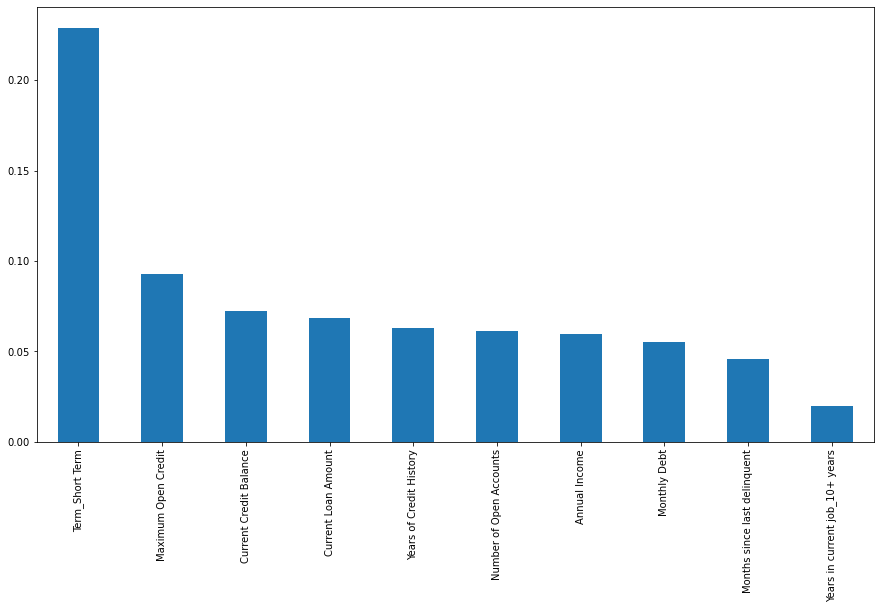

In [288]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train_out.columns)
feat_importances.nlargest(10).plot(kind='bar', figsize=(15,8))
plt.show()

In [289]:
feat_importances.sort_values(ascending=False).index

Index(['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_7 years',
       'Years in current job_6 years', 'Years in current job_5 years',
       'Bankruptcies', 'Home Ownership_Own Home',
       'Years in current job_4 years', 'Years in current job_8 years',
       'Years in current job_Unavailable', 'Years in current job_9 years',
       'Purpose_Other', 'Purpose_Home Improvements', 'Tax Liens',
       'Purpose_Buy House', 'Purpose_Medical Bills', 'Purpose_Buy a Car',
       'Purpose_small_business', 'Purpose_Take a Trip',


In [290]:
# Traning model with 20 features 
reg_rf_model=RandomForestRegressor(random_state=1)

reg_rf_model.fit(X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train_out)

RandomForestRegressor(random_state=1)

In [291]:
reg_rf_model.score(X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train_out)


0.9093362575462511

In [292]:
reg_rf_model.score(X_test_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_test_out)


0.3543163591044516

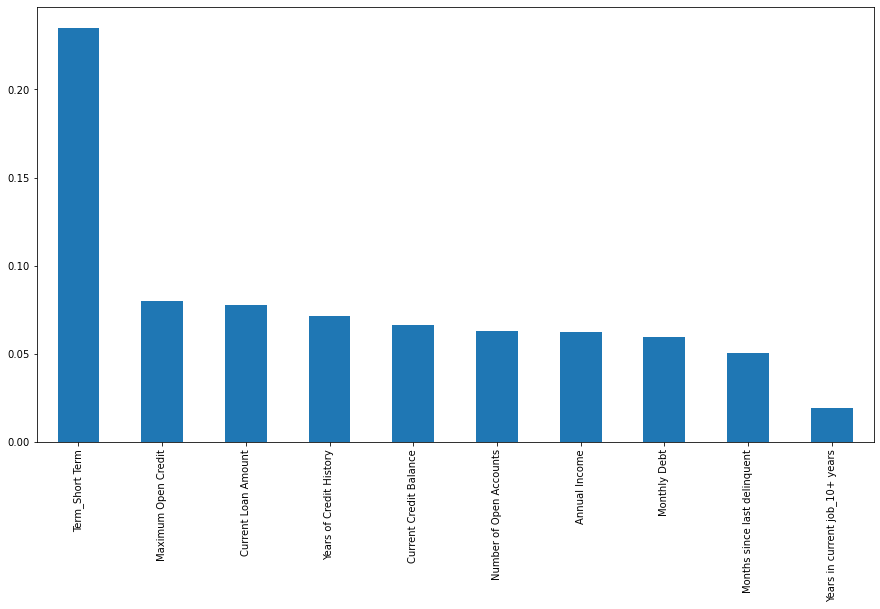

In [293]:
reg= ExtraTreesRegressor()
reg.fit(X_train,y_train)
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar', figsize=(15,8))
plt.show()

In [294]:
feat_importances.sort_values(ascending=False)

Term_Short Term                     0.234972
Maximum Open Credit                 0.079917
Current Loan Amount                 0.077838
Years of Credit History             0.071487
Current Credit Balance              0.066061
Number of Open Accounts             0.062800
Annual Income                       0.062471
Monthly Debt                        0.059656
Months since last delinquent        0.050400
Years in current job_10+ years      0.019352
Loan Status_Fully Paid              0.018516
Years in current job_2 years        0.013686
Years in current job_< 1 year       0.013367
Years in current job_3 years        0.012995
Purpose_Debt Consolidation          0.012980
Number of Credit Problems           0.011791
Years in current job_5 years        0.011492
Years in current job_7 years        0.011244
Years in current job_6 years        0.011111
Years in current job_4 years        0.010225
Home Ownership_Rent                 0.009909
Years in current job_8 years        0.009666
Bankruptci

<a id='elas'></a>
## ElasticNet Regressor

In [295]:
from sklearn.linear_model import ElasticNet

rfe_X_train_out=X_train_out[['Current Loan Amount', 'Annual Income', 'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_small_business',
       'Purpose_vacation', 'Months since last delinquent', 'Bankruptcies',
       'Tax Liens']]

rfe_X_test_out=X_test_out[['Current Loan Amount', 'Annual Income',  'Current Credit Balance',
       'Maximum Open Credit', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_Unavailable', 'Home Ownership_Own Home',
       'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car',
       'Purpose_Debt Consolidation', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose_major_purchase', 'Purpose_moving', 'Purpose_small_business',
       'Purpose_vacation', 'Months since last delinquent', 'Bankruptcies',
       'Tax Liens']]

enet = ElasticNet(alpha = 0.00001, l1_ratio = 0.2, max_iter = 1000, random_state=42,positive=False,selection='random')

# fit the model on train data
enet.fit(rfe_X_train_out, y_train_out)
print(enet.score(rfe_X_train_out, y_train_out))
print(enet.score(rfe_X_test_out, y_test_out))

0.3289480384217378
0.31837169859132786


<a id='mlp'></a>
## MLP Regressor

##### MLPRegressor with outlier

In [296]:
from sklearn.neural_network import MLPRegressor

In [297]:
mlpmodel = MLPRegressor(activation='relu', solver='adam', 
                        alpha=0.0001, learning_rate='constant', 
                        power_t=0.5, max_iter=200,random_state=42)

In [298]:
mlpmodel.fit(X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train_out)

MLPRegressor(random_state=42)

In [299]:
mlpmodel.score(X_train[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train)

0.03596651044025989

In [300]:
mlpmodel.score(X_test[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_test)

-0.0006258343568805724

##### MLPRegressor without outlier

In [301]:
mlpmodel.fit(X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train_out)

MLPRegressor(random_state=42)

In [302]:
mlpmodel.score(X_train_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_train_out)

0.35826916420450183

In [303]:
mlpmodel.score(X_test_out[['Term_Short Term', 'Maximum Open Credit', 'Current Credit Balance',
       'Current Loan Amount', 'Years of Credit History',
       'Number of Open Accounts', 'Annual Income', 'Monthly Debt',
       'Months since last delinquent', 'Years in current job_10+ years',
       'Loan Status_Fully Paid', 'Home Ownership_Rent',
       'Years in current job_2 years', 'Years in current job_< 1 year',
       'Number of Credit Problems', 'Years in current job_3 years',
       'Purpose_Debt Consolidation', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_5 years']],y_test_out)

0.3504891379168237

<a id='modcomp'></a>
## Model Comparison

In [266]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [273]:
X_train_out1 = X_train_out.rename({'Years in current job_< 1 year':'Years in current job__ 1 year'},axis=1)
# user variables to tune
folds   = 5
metric  = "neg_mean_absolute_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["Ridge"]         = Ridge()
models["ElasticNet"]    = ElasticNet()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["MLPRegressor"] = MLPRegressor()
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=10, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)
    results1 = cross_val_score(XGBRegressor(), X_train_out1, y_train_out, cv=k_fold, scoring=metric)
    model_results.extend([results,results1])
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))
results1 = cross_val_score(XGBRegressor(), X_train_out1, y_train_out, cv=k_fold, scoring=metric)
print("XGBoost: {}, {}".format(round(results1.mean(), 3), round(results1.std(), 3)))

Linear: -17.528, 0.096
Lasso: -18.553, 0.078
Ridge: -17.533, 0.105
ElasticNet: -20.004, 0.117
DecisionTree: -22.034, 0.206
KNN: -18.448, 0.146
RandomForest: -16.127, 0.141
AdaBoost: -25.904, 2.311
GradientBoost: -16.04, 0.092
MLPRegressor: -17.136, 0.217
XGBoost: -15.865, 0.188


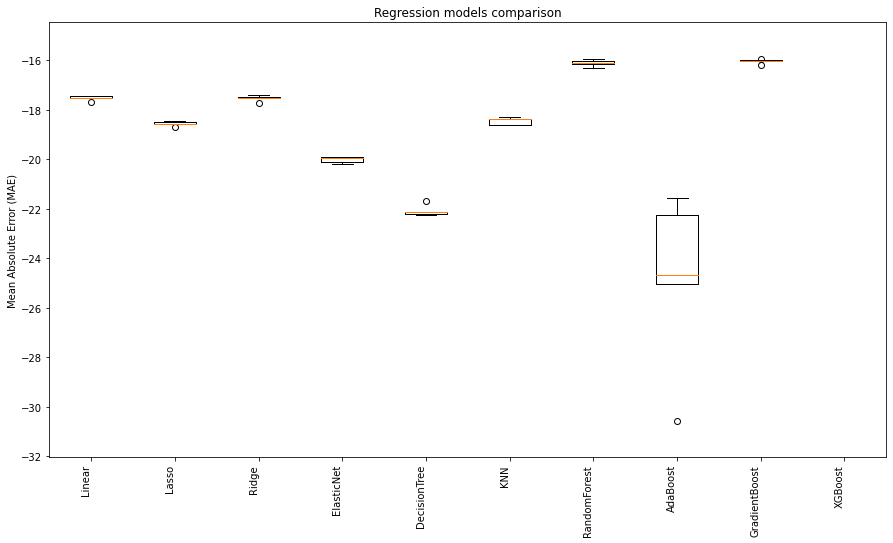

In [ ]:
figure = plt.figure(figsize = (15,8))

axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 90, ha="right")
axis.set_ylabel("Mean Absolute Error (MAE)")
plt.title('Regression models comparison')
plt.margins(0.05, 0.1)

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train,y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((y_train - train_predict) / y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )


MAPE - Mean Absolute Percentage Error (TRAIN DATA):  2.2516985563489142


In [ ]:
model = GradientBoostingRegressor()
model.fit(X_test,y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
#train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

error_percent = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )


MAPE - Mean Absolute Percentage Error (TEST DATA):  2.201685977130069


In [ ]:
dtrain_predictions = model.predict(X_train)
print("Model Report")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, dtrain_predictions)))

Model Report
RMSE : 21.88


In [ ]:
mod = XGBRegressor()
mod.fit(X_train[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']],y_train)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
train_predict = mod.predict(X_train[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']])
test_predict = mod.predict(X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']])

error_percent = np.mean(np.abs((y_train - train_predict) / y_train)) * 100
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",error_percent )


MAPE - Mean Absolute Percentage Error (TRAIN DATA):  1.9348831842743603


In [ ]:
mod = XGBRegressor()
mod.fit(X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']],y_test)

##print("Intercept : ", model.intercept_)
##print("Slope : ", model.coef_)

#Predicting TEST & TRAIN DATA
#train_predict = model.predict(X_train)
test_predict = mod.predict(X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']])

error_percent = np.mean(np.abs((y_test - test_predict) / y_test)) * 100
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",error_percent )
y_test, test_predict = np.array(y_test), np.array(test_predict)

MAPE - Mean Absolute Percentage Error (TEST DATA):  1.6713109875521188


In [ ]:

#Print model report:
print("Model Report train(XGB)")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,train_predict)))
    

Model Report train(XGB)
RMSE : 18.48


In [ ]:
print("Model Report test(XGB)")
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_test,test_predict)))

Model Report test(XGB)
RMSE : 15.96


In [ ]:
mod.score(X_test[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']],y_test)

0.6622202381160804

In [ ]:
mod.score(X_train[['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']],y_train)

0.34039945986775044

In [ ]:
fea = ['Current Loan Amount', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Loan Status_Fully Paid', 'Term_Short Term',
       'Years in current job_10+ years', 'Years in current job_2 years',
       'Years in current job_3 years', 'Years in current job_4 years',
       'Years in current job_5 years', 'Years in current job_6 years',
       'Years in current job_7 years', 'Years in current job_8 years',
       'Years in current job_9 years']

In [ ]:
xgb_mod = XGBRegressor(n_estimators=500,max_depth = 5, gamma =0,learning_rate=0.1,
                       subsample=0.8, colsample_bytree = 0.8,reg_alpha=80,reg_lambda=0.01,
                       random_state=1,min_child_weight=1,scale_pos_weight=1)


xgb_mod.fit(X_train[fea], y_train)
print(xgb_mod.score(X_train[fea], y_train))
print(xgb_mod.score(X_test[fea], y_test))

0.5523745046852404
0.37659000516627794


In [ ]:
#baseline model for comparision of model evaluation
#mean of training dataset
mean_train = np.mean(y_train)
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print('Baseline MAE on test:',round(mae_baseline,2))
mse_baseline = mean_squared_error(y_test, baseline_predictions)
print('Baseline MSE on test:',round(mse_baseline,2))
print("MAPE - Mean Absolute Percentage Error (TEST DATA): ",np.mean(np.abs((y_test - baseline_predictions) / y_test)) * 100)
print('Baseline MAE on train:', round(mean_absolute_error(y_train, np.ones(y_train.shape) * mean_train),2))
print('Baseline MSE on train:', round(mean_squared_error(y_train, np.ones(y_train.shape) * mean_train),2))
print("MAPE - Mean Absolute Percentage Error (TRAIN DATA): ",np.mean(np.abs((y_train - np.ones(y_train.shape) * mean_train) / y_train)) * 100)


Baseline MAE on test: 20.98
Baseline MSE on test: 754.24
MAPE - Mean Absolute Percentage Error (TEST DATA):  2.983958332484194
Baseline MAE on train: 21.3
Baseline MSE on train: 780.07
MAPE - Mean Absolute Percentage Error (TRAIN DATA):  3.0335516913004614
